In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# using klib library to perform data cleaning . Removes columns which has all empty values or one values and 
#convert data types to proper format

In [12]:

pip install klib

Note: you may need to restart the kernel to use updated packages.


In [104]:
# Loading the loan.csv file into a dataframe
df = pd.read_csv('/Users/razatranjan/Documents/DataScience/Case_Study_LendingLoans/loan.csv', index_col = "id")

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_23488/2468537359.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/razatranjan/Documents/DataScience/Case_Study_LendingLoans/loan.csv', index_col = "id")


In [11]:
############ DATA CLEANING AND REFINING ###############

In [105]:
 # Using the klib lib to perform cleaning of data
import klib

In [106]:
df.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [107]:
# Performing cleaning
df = klib.data_cleaning(df)

Shape of cleaned data: (39717, 48) - Remaining NAs: 43138


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 62
     of which 6 single valued.     Columns: ['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']
Dropped missing values: 2220226
Reduced memory by at least: 27.66 MB (-79.85%)



In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   member_id                   39717 non-null  int32   
 1   loan_amnt                   39717 non-null  int32   
 2   funded_amnt                 39717 non-null  int32   
 3   funded_amnt_inv             39717 non-null  float64 
 4   term                        39717 non-null  category
 5   int_rate                    39717 non-null  category
 6   installment                 39717 non-null  float32 
 7   grade                       39717 non-null  category
 8   sub_grade                   39717 non-null  category
 9   emp_title                   37258 non-null  string  
 10  emp_length                  38642 non-null  category
 11  home_ownership              39717 non-null  category
 12  annual_inc                  39717 non-null  float64 
 13  verification_sta

In [109]:
# Cleaning the data and refining some columns values to proper values
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace("%", ""))

df['revol_util'] = df['revol_util'].str.replace("%", "")
df['zip_code'] = df['zip_code'].str.replace("x", "")
df['zip_code_3_chars'] = df['zip_code']
df.drop(['zip_code'], axis=1, inplace = True)


df['emp_length'] = df['emp_length'].str.replace("years", "")
df['emp_length'] = df['emp_length'].str.replace("year", "")
df['emp_length'] = df['emp_length'].str.replace(" ", "")

In [110]:
df['emp_length']

0        10+
1         <1
2        10+
3        10+
4          1
        ... 
39712      4
39713      3
39714     <1
39715     <1
39716     <1
Name: emp_length, Length: 39717, dtype: object

In [111]:
# Custom method to convert emp length to Fresher , Junior , Mid , High , Very High

def find_experience(exp):
    exp_cat = "NA"
    try:
        exp = int(exp)
        if exp >=1 and exp <3:
            exp_cat = "Junior"
        elif exp>=3 and exp<6:
            exp_cat = "Mid"
        elif exp>=6 and exp<=10:
            exp_cat = "High"
    except Exception as e:
        if exp == "10+":
            exp_cat = "Very High"
        elif exp == "<1":
            exp_cat = "Fresher";
    return exp_cat

In [112]:
df['emp_length'] = df['emp_length'].apply(lambda x: find_experience(x))


In [113]:
df['emp_length'].head(5)

0    Very High
1      Fresher
2    Very High
3    Very High
4       Junior
Name: emp_length, dtype: object

In [114]:
# Assigning a proper name 'experience' for the column emp_length
df['experience'] = df['emp_length']

In [115]:
df.drop(['emp_length'], axis=1, inplace = True)

In [116]:
df['experience'].head(5)

0    Very High
1      Fresher
2    Very High
3    Very High
4       Junior
Name: experience, dtype: object

In [117]:
# We can drop columns like emp_title , url , desc as these attributes are relations with loans for charged off

# We can drop tax_liens , chargeoff_within_12_mths ,  collections_12_mths_ex_med as these contains only 0 , NA and Blank values

df.drop(['emp_title', 'desc', 'url', 'tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'], axis=1, inplace = True)



In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   member_id                39717 non-null  int32   
 1   loan_amnt                39717 non-null  int32   
 2   funded_amnt              39717 non-null  int32   
 3   funded_amnt_inv          39717 non-null  float64 
 4   term                     39717 non-null  category
 5   int_rate                 39717 non-null  category
 6   installment              39717 non-null  float32 
 7   grade                    39717 non-null  category
 8   sub_grade                39717 non-null  category
 9   home_ownership           39717 non-null  category
 10  annual_inc               39717 non-null  float64 
 11  verification_status      39717 non-null  category
 12  issue_d                  39717 non-null  category
 13  loan_status              39717 non-null  category
 14  purpos

In [119]:
# Custom method to convert date type in format such as'AUG-03' to a valid dtype: datetime64[ns] '2003-08-01'

def get_valid_dates(d):
    try:
        d_year = int(d[d.index("-")+1:])
        current_year = pd.Timestamp.today().year%100

        if d_year > current_year :
            year = "19"+ str(d[d.index("-")+1:])
        else:
            year = "20"+ str(d[d.index("-")+1:])
    
        d = d[:d.index("-")+1:] + str(year)
    except Exception as e :
        return d;
    return d;

In [ ]:
# Convert earliest_cr_line, issue_d, last_pymnt_d and last_credit_pull_d to standard date datetime64 format .

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: get_valid_dates(x))
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'] ,format='%b-%Y')


df['issue_d'] = df['issue_d'].apply(lambda x: get_valid_dates(x))
df['issue_d'] = pd.to_datetime(df['issue_d'] ,format='%b-%Y')

df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: get_valid_dates(x))
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'] ,format='%b-%Y')

df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: get_valid_dates(x))
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'] ,format='%b-%Y')

In [123]:
# Converting some columns data types tom proper values as per the business needs and requirements

df['issue_d'] = df['issue_d'].astype('datetime64[ns]')
df['earliest_cr_line'] = df['earliest_cr_line'].astype('datetime64[ns]')
df['last_pymnt_d'] = df['last_pymnt_d'].astype('datetime64[ns]')
df['last_credit_pull_d'] = df['last_credit_pull_d'].astype('datetime64[ns]')

In [124]:
df['int_rate'] = df['int_rate'].astype('float32')
df['experience'] = df['experience'].astype('category')
df['zip_code_3_chars'] = df['zip_code_3_chars'].astype('category')

In [121]:
######################################     DATA ANALYSIS    ########################################

In [125]:
#Based on analysis , we can find that some attributes are not needed as these columns are not available during loan sanction process

# Dropping these columns -

attr_not_avail_during_loan_sanction =  [
  "earliest_cr_line",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]


In [21]:
df = df.drop(attr_not_avail_during_loan_sanction, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   member_id               39717 non-null  int32         
 1   loan_amnt               39717 non-null  int32         
 2   funded_amnt             39717 non-null  int32         
 3   funded_amnt_inv         39717 non-null  float64       
 4   term                    39717 non-null  category      
 5   int_rate                39717 non-null  float32       
 6   installment             39717 non-null  float32       
 7   grade                   39717 non-null  category      
 8   sub_grade               39717 non-null  category      
 9   home_ownership          39717 non-null  category      
 10  annual_inc              39717 non-null  float64       
 11  verification_status     39717 non-null  category      
 12  issue_d                 39717 non-null  dateti

In [126]:
# Removing current status from loan status . 
 # Will analyse only Fully Paid and Charged off.  Assigning Charged as 1 and Fully Paid as 0.
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

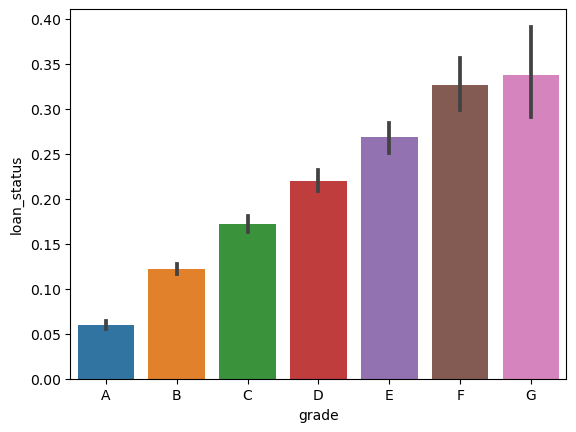

In [127]:
#Grades
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()


# As Grades are going from A to G , Default rates increases . 

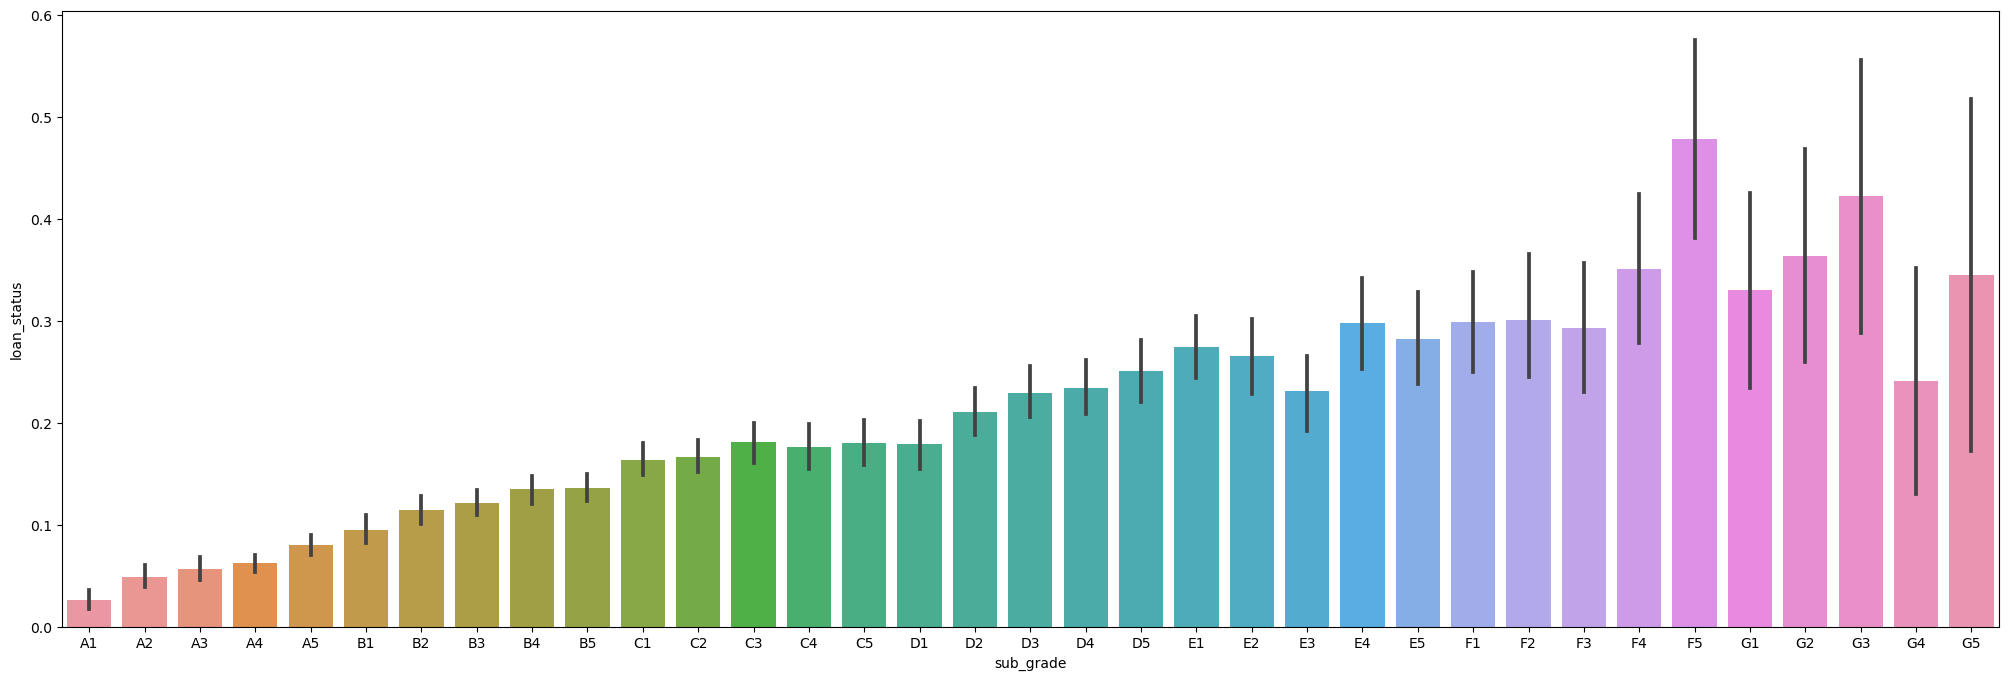

In [128]:
# Sub Grades

plt.figure(figsize=(25, 8))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

# below bplots explain how the subgrades impacts the charged off

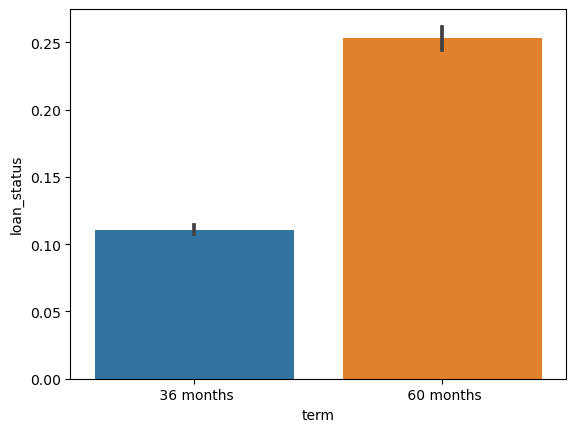

In [129]:
 # Term
sns.barplot(x='term', y='loan_status', data=df)
plt.show()


# people who took loan term of 5 years do more charged off

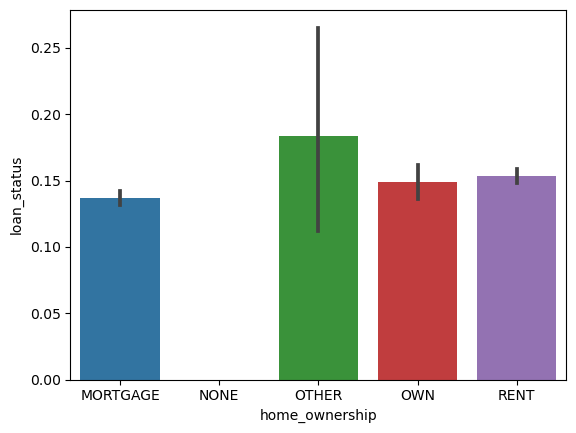

In [130]:
# Home Ownership

sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()


# Inferences :
# no inferences can be drawn from here 

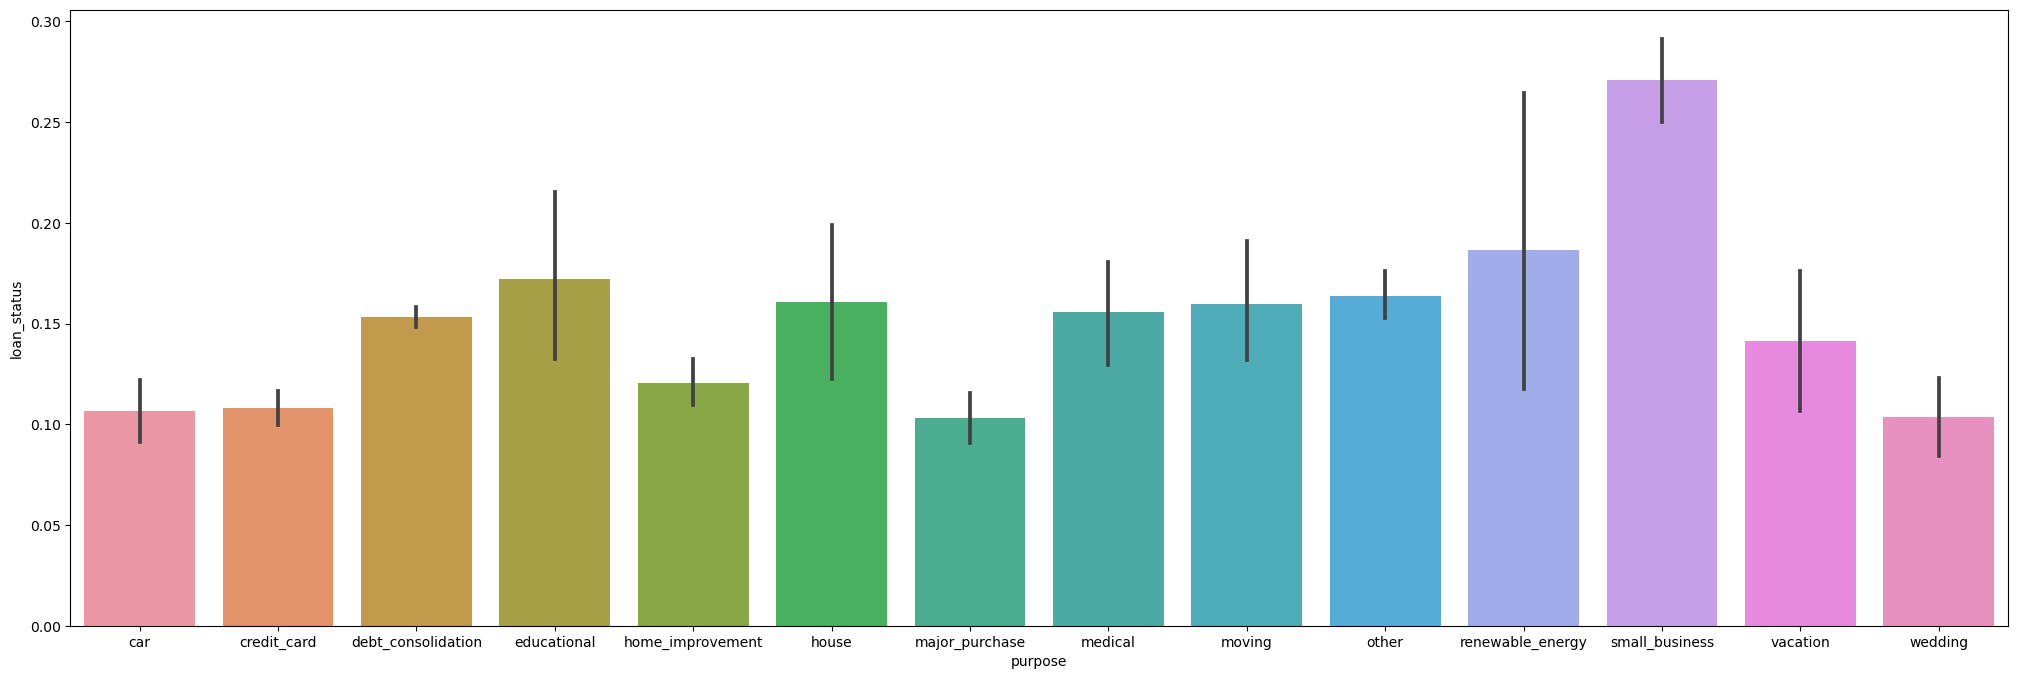

In [131]:
# Purpose

plt.figure(figsize=(25, 8))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

# Inferences :
# People who did small business did more defaults .


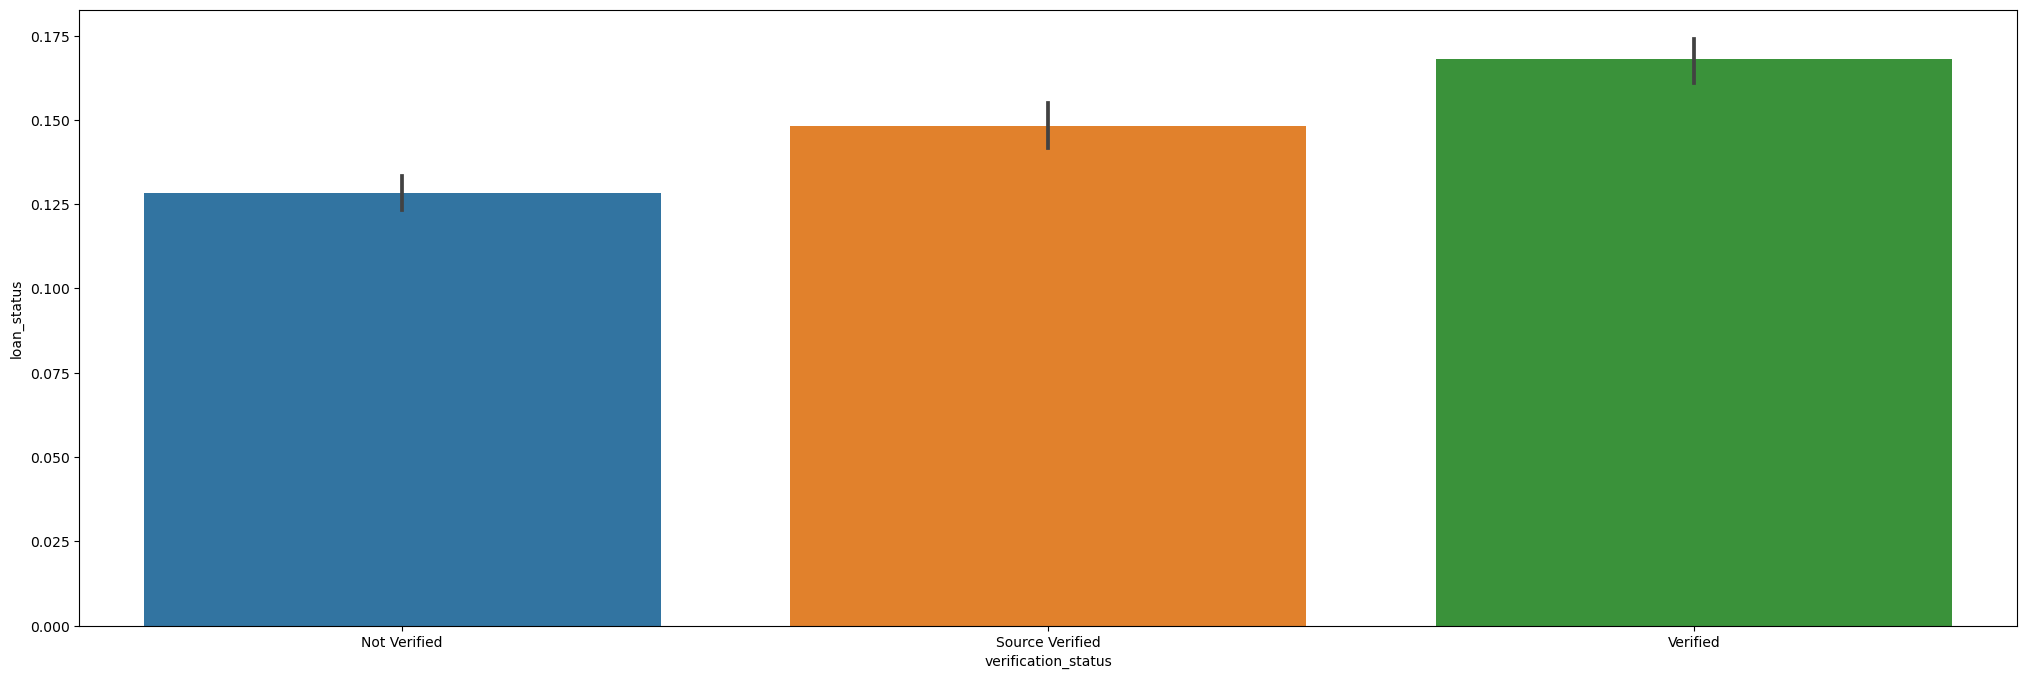

In [132]:
# Verification Status

plt.figure(figsize=(25, 8))
sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()


# Inferences :
# No proper inferences



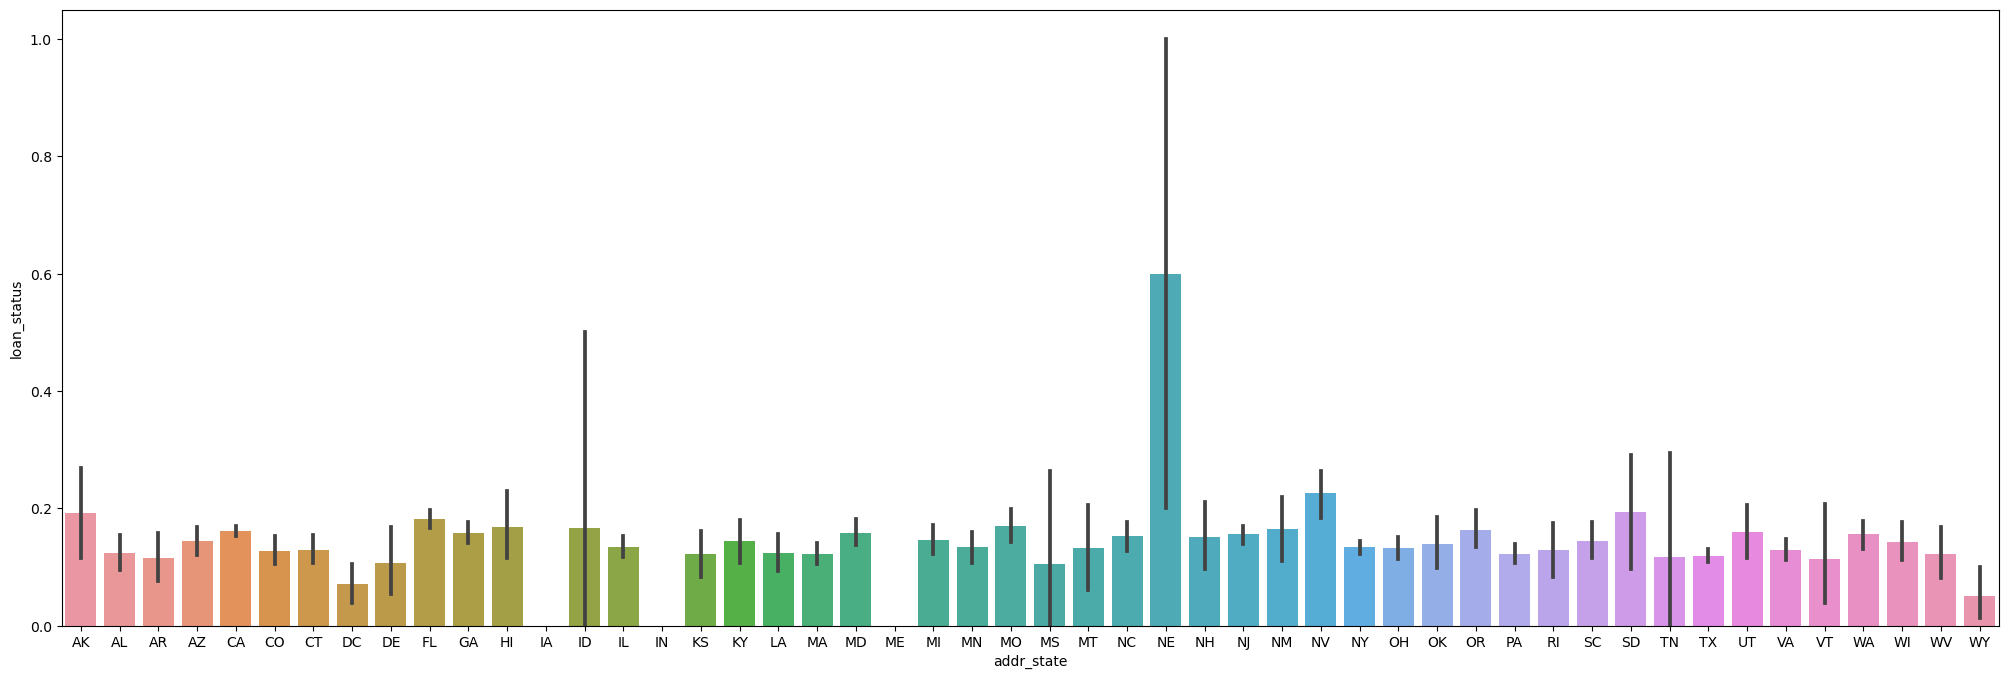

In [133]:
# Address State


plt.figure(figsize=(25, 8))
sns.barplot(x='addr_state', y='loan_status', data=df)
plt.show()


# Inferences :
#Address State NE are having more chances of defaulters

In [134]:
#Installments

df['installment'].describe()

count    38577.000000
mean       322.466339
std        208.637543
min         15.690000
25%        165.740005
50%        277.859985
75%        425.549988
max       1305.189941
Name: installment, dtype: float64

<Axes: title={'center': 'installment'}, xlabel='loan_status'>

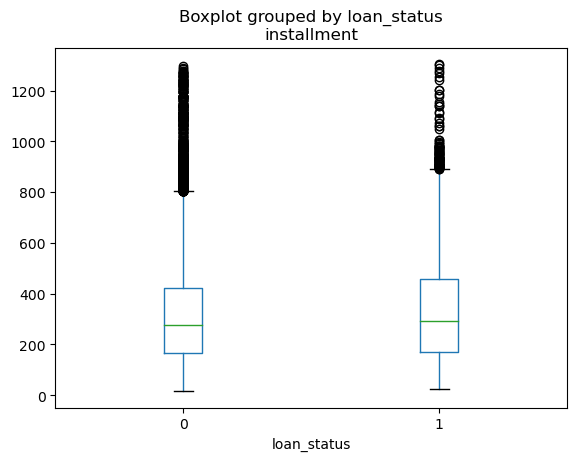

In [135]:
df.boxplot(by ='loan_status', column =['installment'], grid = False) 

In [136]:
# handling the outliers
Q1 = df['installment'].quantile(0.25)
Q3 = df['installment'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-223.97496795654297
815.2649612426758


In [137]:
df['installment']

0        162.869995
1         59.830002
2         84.330002
3        339.309998
5        156.460007
            ...    
39712     78.419998
39713    275.380005
39714    156.839996
39715    155.380005
39716    255.429993
Name: installment, Length: 38577, dtype: float32

In [138]:
df['installment_range'] = pd.cut(x=df['installment'], bins=range(0, 1000, 200))


In [139]:
df['installment_range'].head(3)

0    (0, 200]
1    (0, 200]
2    (0, 200]
Name: installment_range, dtype: category
Categories (4, interval[int64, right]): [(0, 200] < (200, 400] < (400, 600] < (600, 800]]

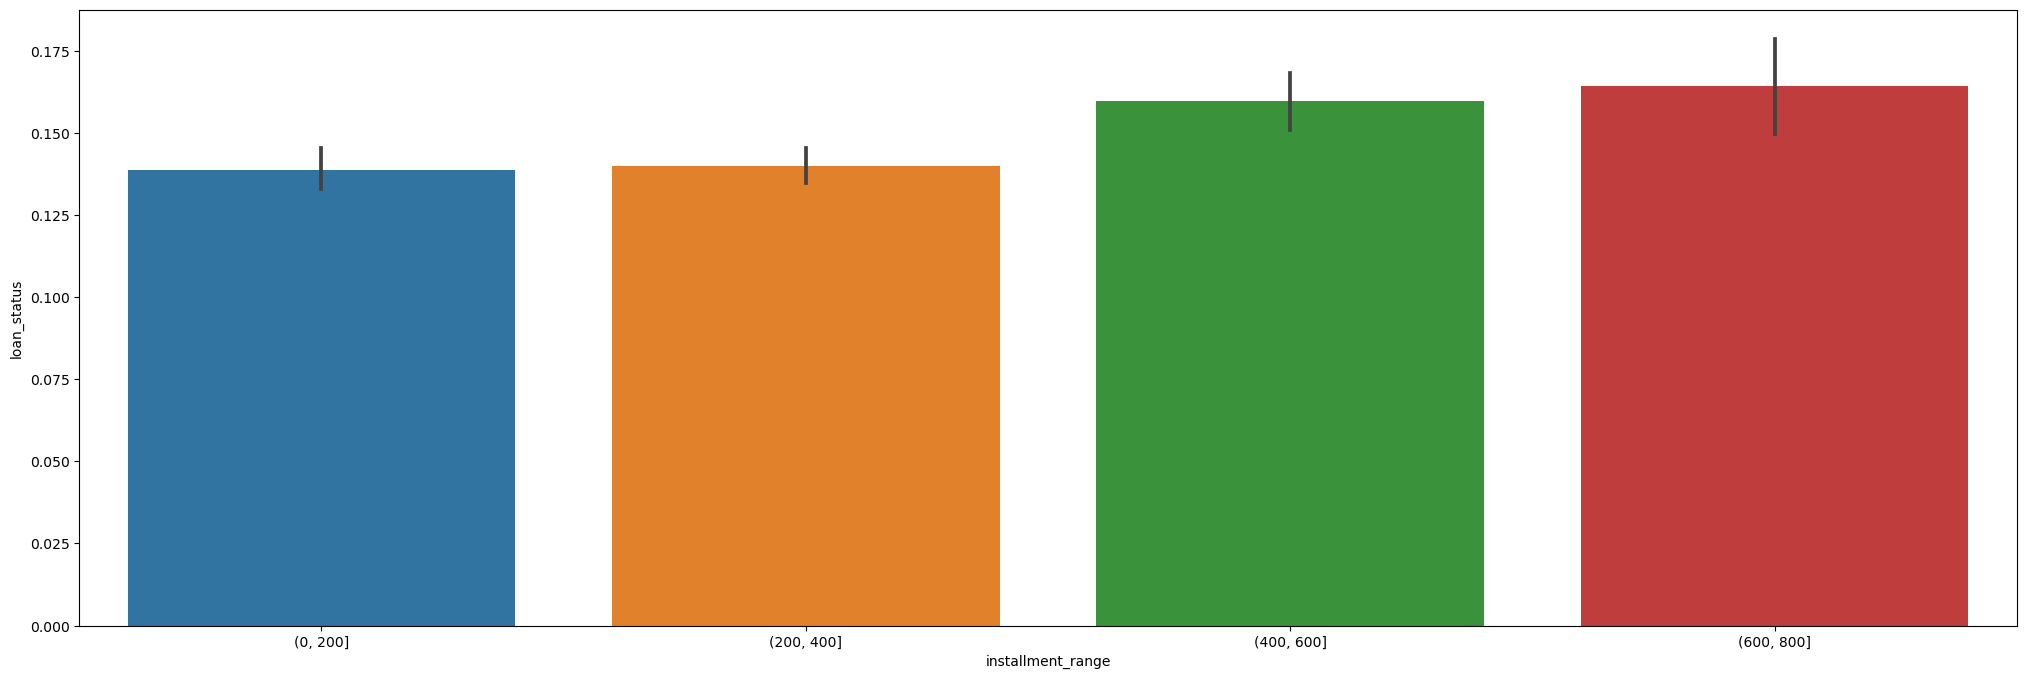

In [140]:
plt.figure(figsize=(25, 8))
sns.barplot(x='installment_range', y='loan_status', data=df)
plt.show()

# As Installment is increasing more, Charged off is more 

In [141]:
# Int_rates

df['int_rate'].describe()

count    38577.000000
mean        11.932220
std          3.691246
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

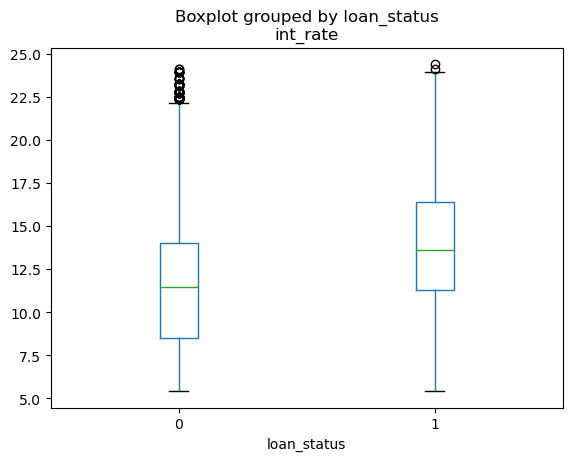

In [142]:
df.boxplot(by ='loan_status', column =['int_rate'], grid = False) 

In [143]:
# handling the outliers
Q1 = df['int_rate'].quantile(0.25)
Q3 = df['int_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

# lower is 3 so bot much lower outliers
# upper is equal to max so we can consider no higher outliers

0.779998779296875
22.540000915527344


In [144]:
# Grouping interest rate into bins of size 6 .
df['int_rate_range'] = pd.cut(x=df['int_rate'], bins=range(0, 30, 6))

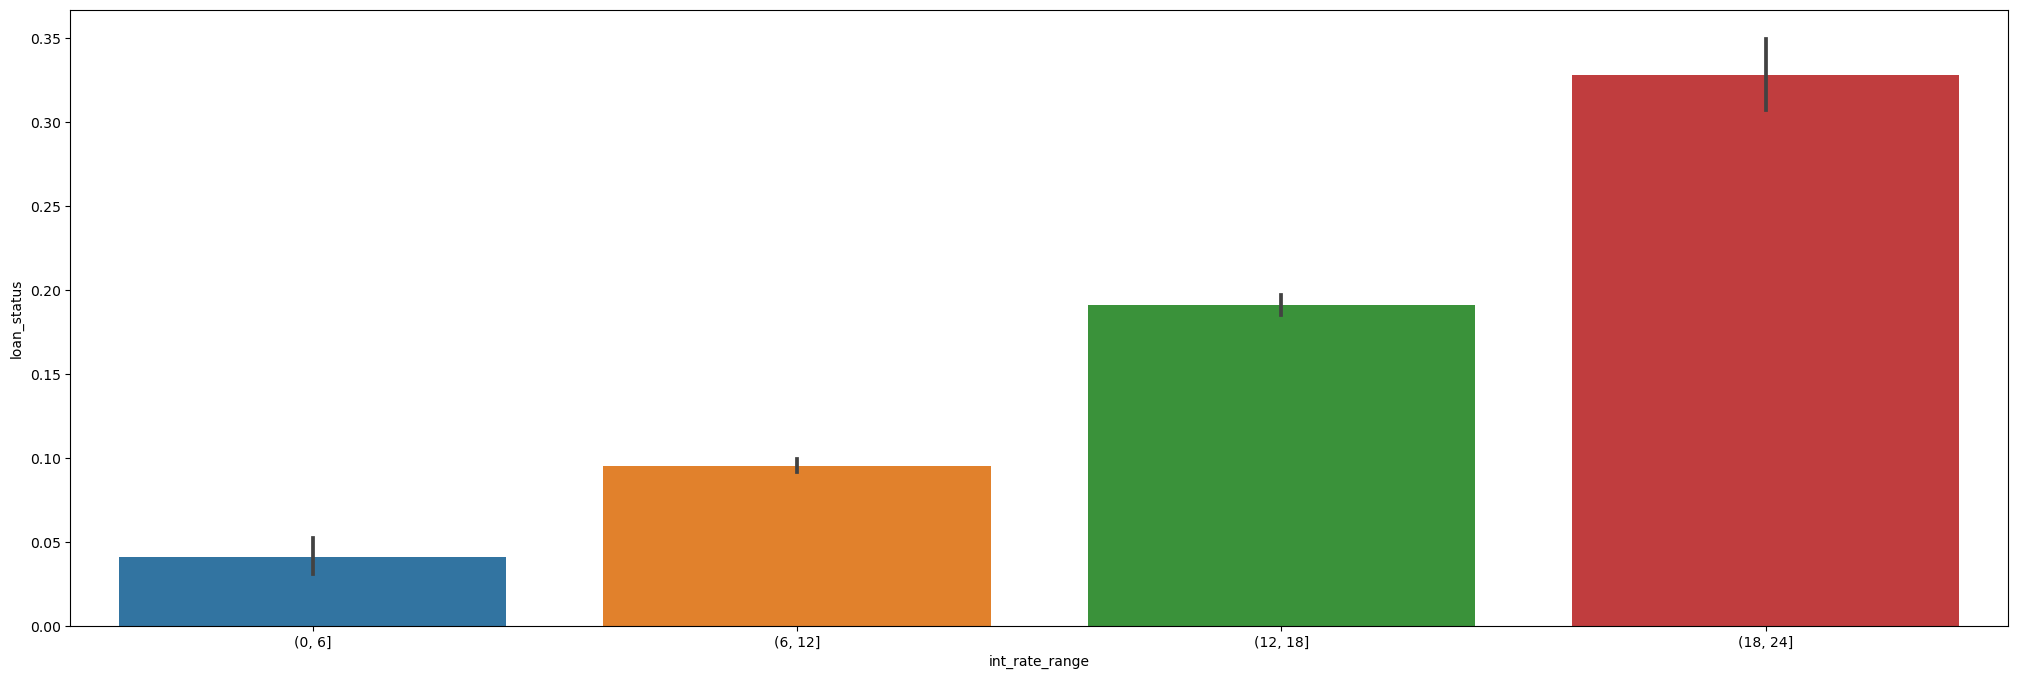

In [145]:

plt.figure(figsize=(25, 8))
sns.barplot(x='int_rate_range', y='loan_status', data=df)
plt.show()
          
# Inferences :                       
# As Interest Rate is more , Charged Off is more .

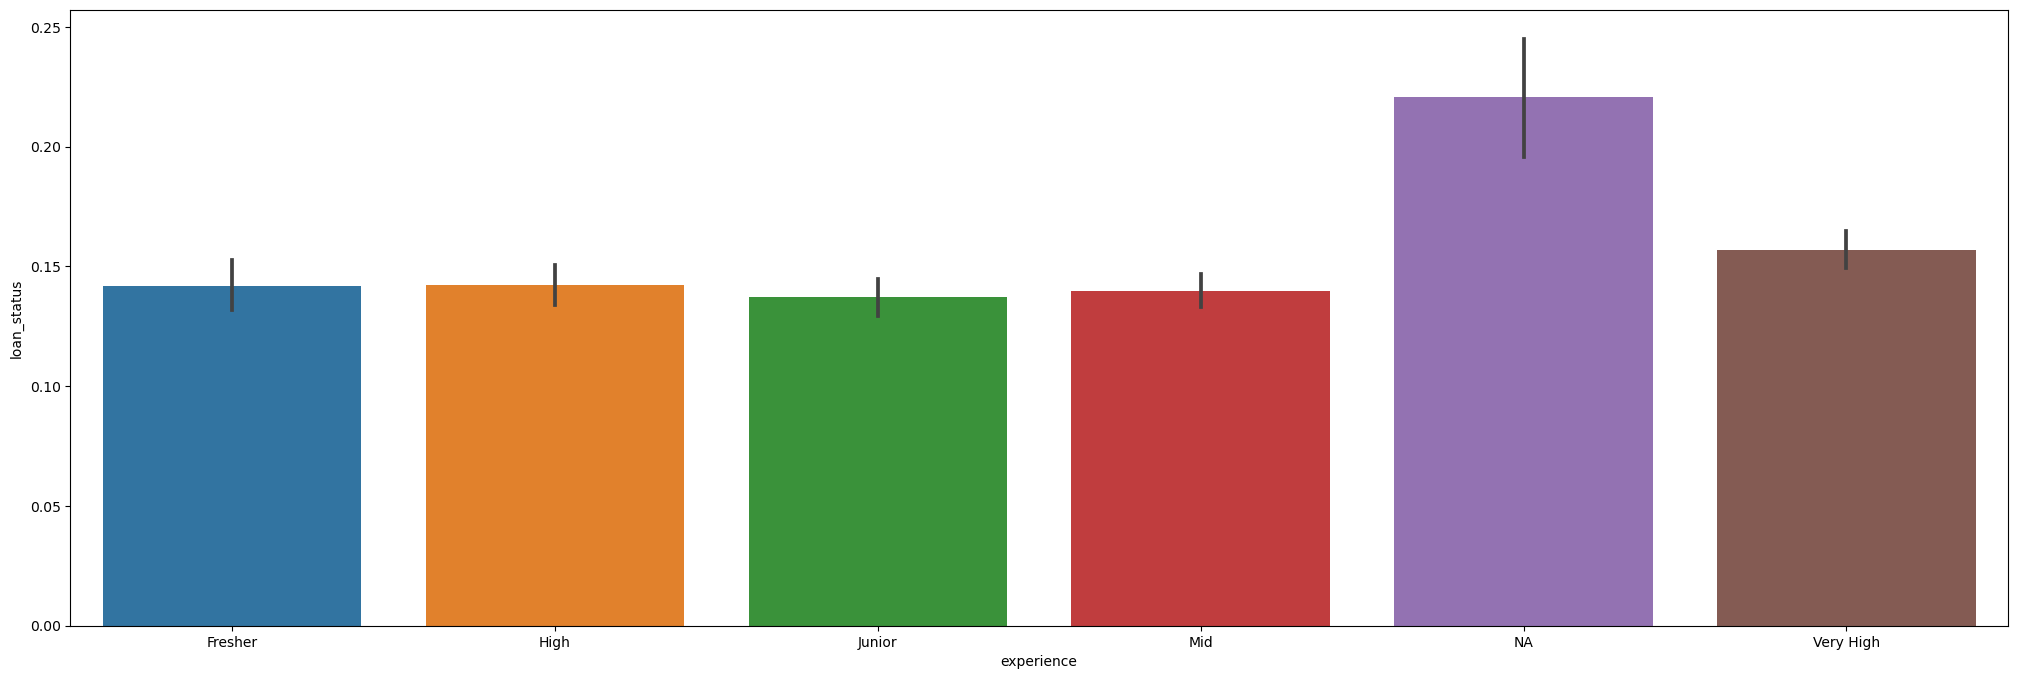

In [146]:
# Experience


plt.figure(figsize=(25, 8))
sns.barplot(x='experience', y='loan_status', data=df)
plt.show()


# Inferences :
# Very High exp people doing more charged off Comparatively but not significantly .


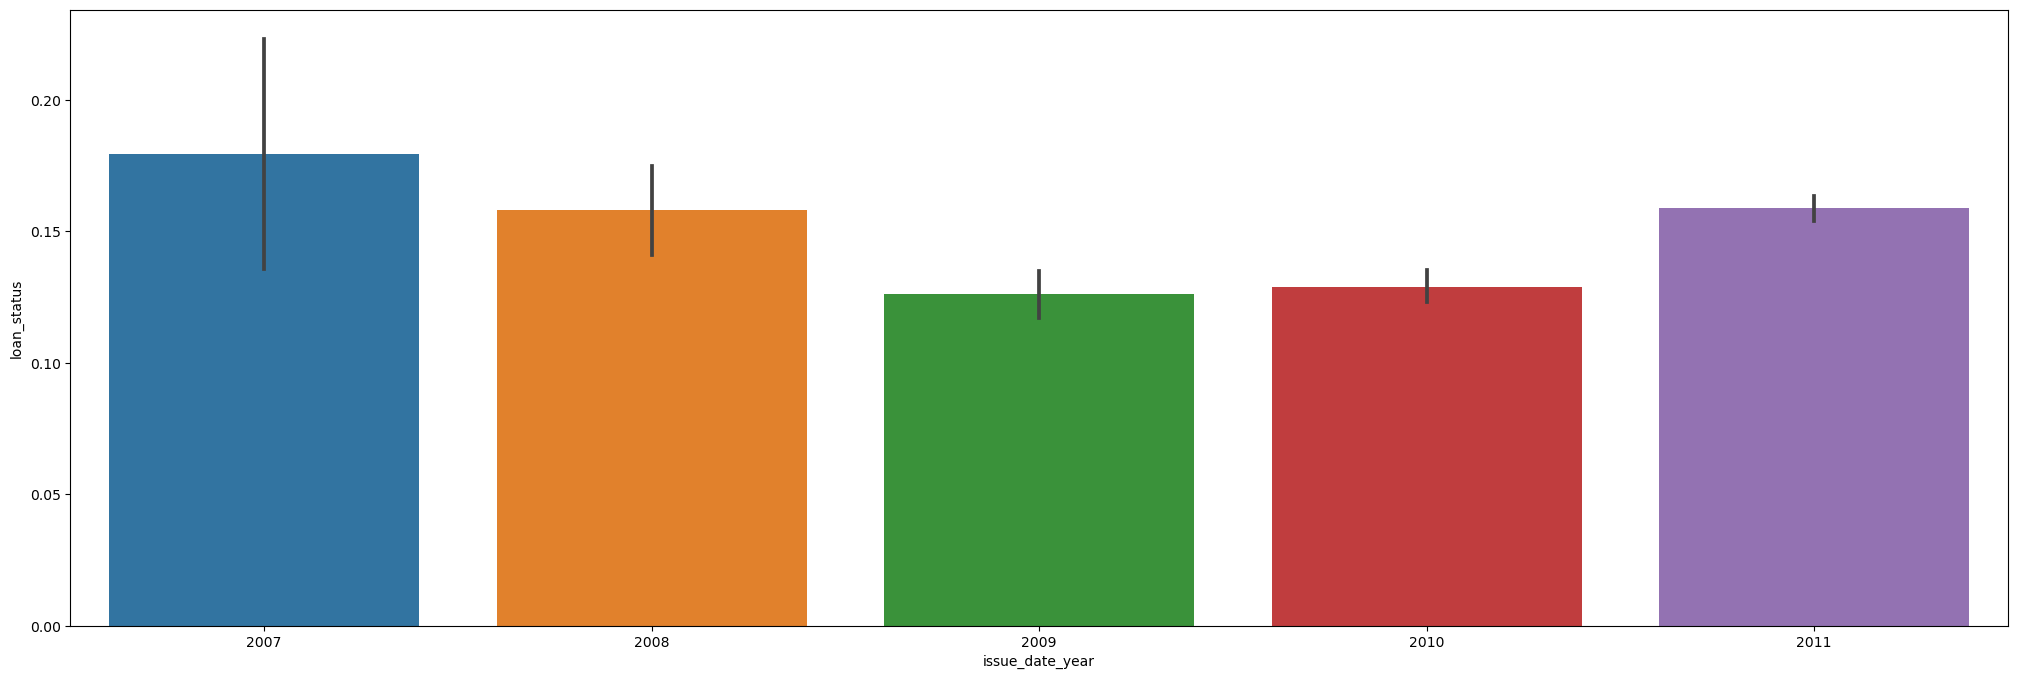

In [148]:
# Issue Date

df['issue_date_year'] = df['issue_d'].dt.year
df['issue_date_year']


plt.figure(figsize=(25, 8))
sns.barplot(x='issue_date_year', y='loan_status', data=df)
plt.show()
 

# Inferences :
# 2007  and 2011 charged off more . Let's analyse the month 

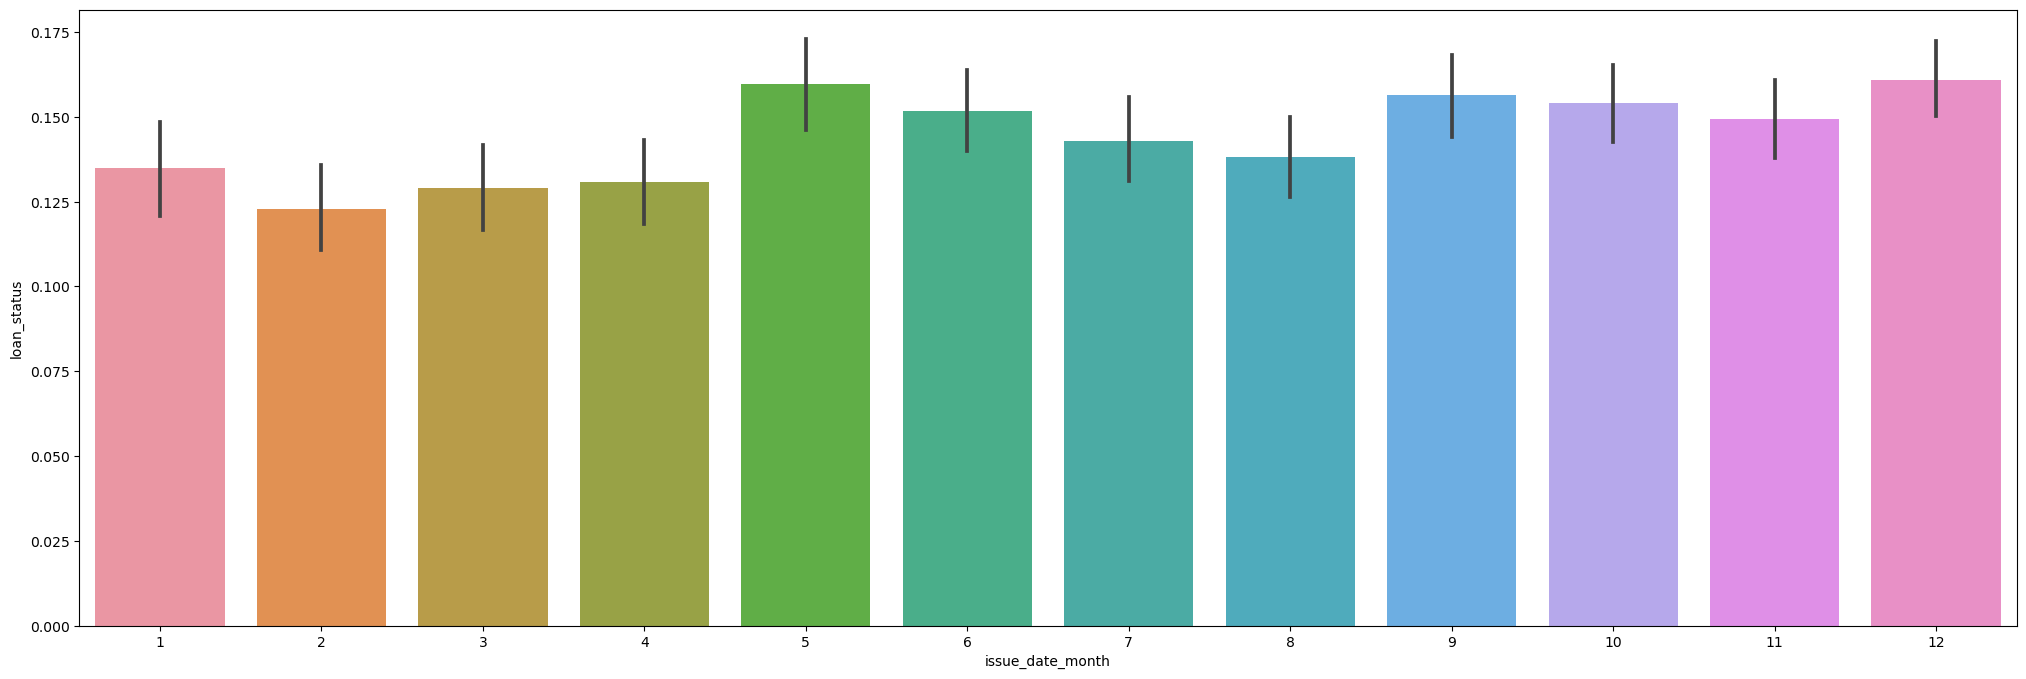

In [149]:
df['issue_date_month'] = df['issue_d'].dt.month
df['issue_date_month']


plt.figure(figsize=(25, 8))
sns.barplot(x='issue_date_month', y='loan_status', data=df)
plt.show()

# Couldn't find any pattern.

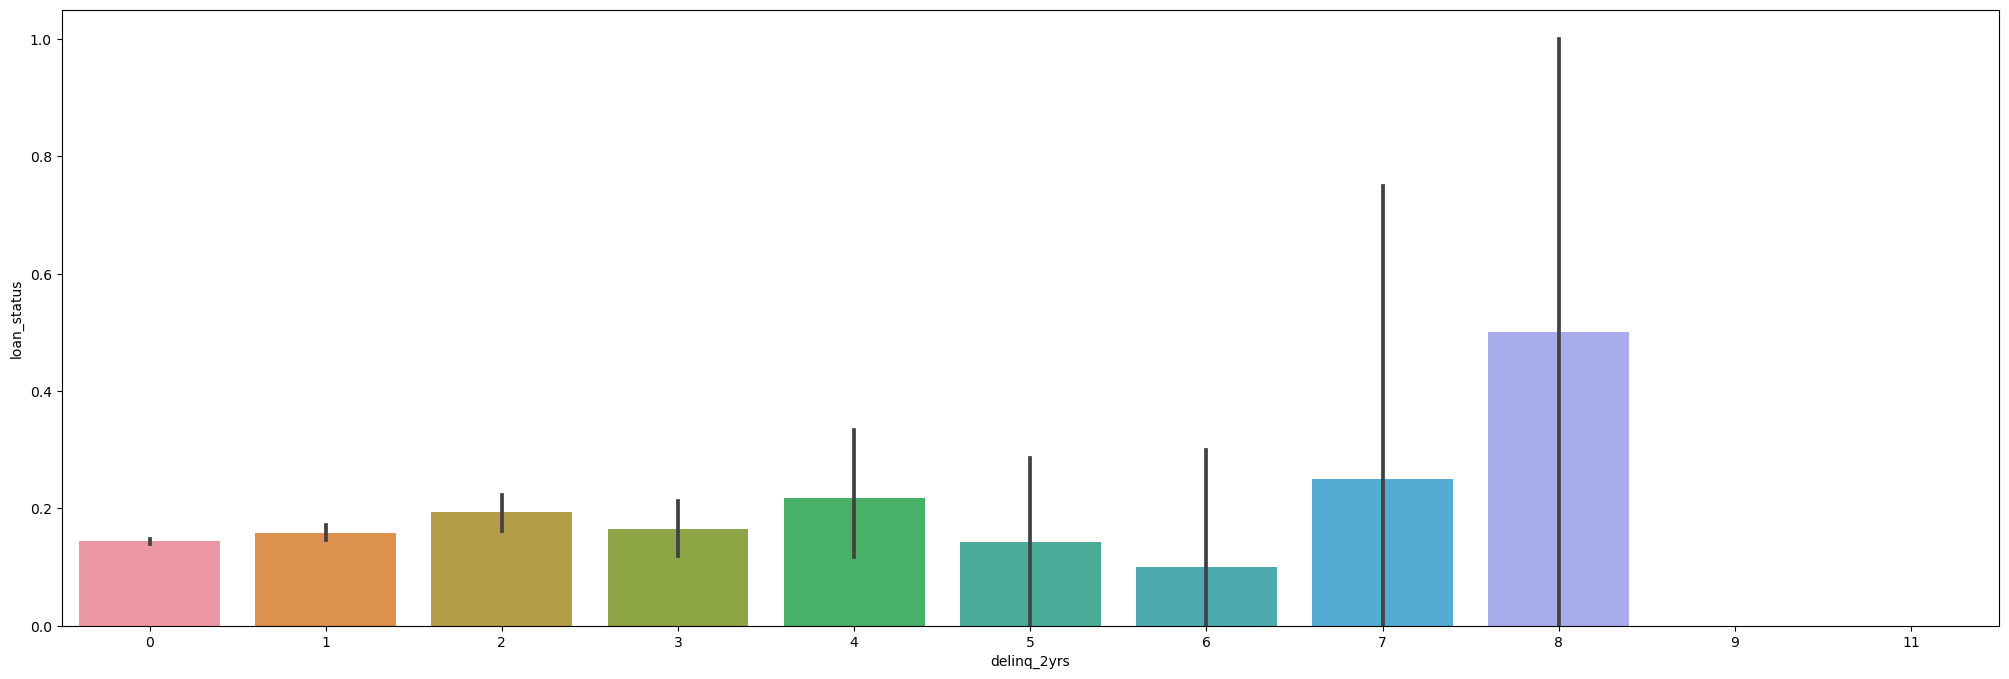

In [150]:
# Deling 2 years

plt.figure(figsize=(25, 8))
sns.barplot(x='delinq_2yrs', y='loan_status', data=df)
plt.show()


# delinq_2yrs of 8 have done the most default

In [151]:
# Loan Amount

df['loan_amnt'].describe()

# Difference between 75% and 25% loan_amount gives sense of spread of data 
#i.e 10900 and 10000 is median . Approx 10000 is the amount people took loan and charged off. 

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: title={'center': 'loan_amnt'}, xlabel='loan_status'>

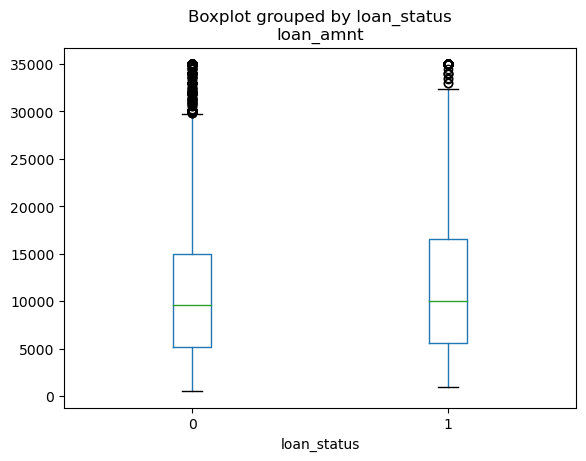

In [152]:
df.boxplot(by ='loan_status', column =['loan_amnt'], grid = False) 

In [153]:
# Grouping into bins of size 5000 .

df['loan_amount_range'] = pd.cut(x=df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])

df['loan_amount_range']



# From Histogram also we can see in range of 5000-10000 max people who took loan charged off .

0            (0, 5000]
1            (0, 5000]
2            (0, 5000]
3        (5000, 10000]
5            (0, 5000]
             ...      
39712        (0, 5000]
39713    (5000, 10000]
39714        (0, 5000]
39715        (0, 5000]
39716    (5000, 10000]
Name: loan_amount_range, Length: 38577, dtype: category
Categories (8, interval[int64, right]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000] < (25000, 30000] < (30000, 35000] < (35000, 40000]]

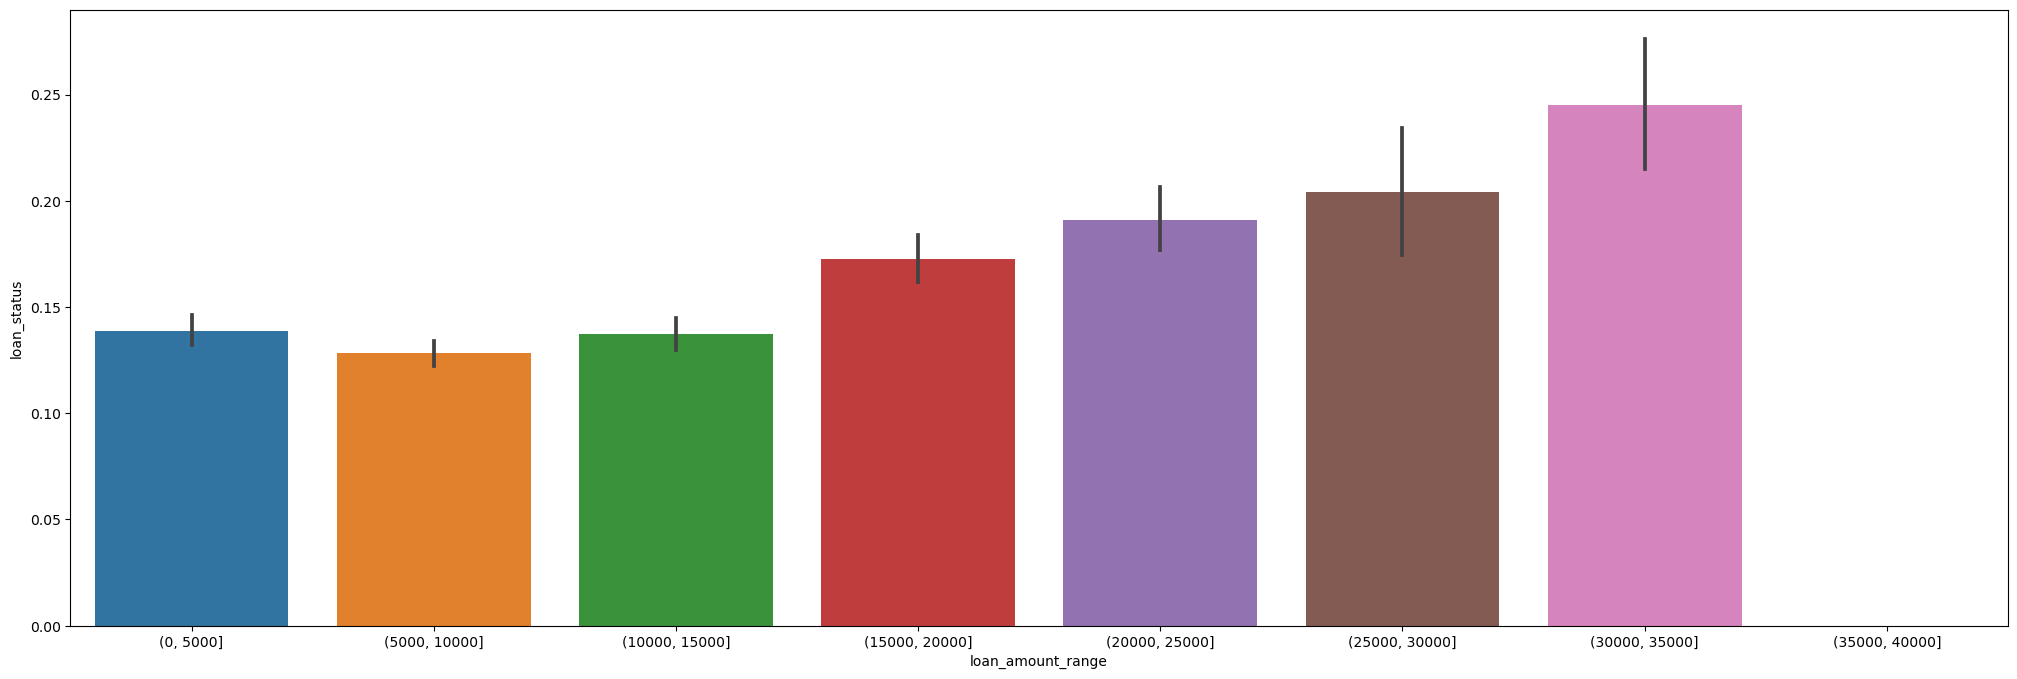

In [154]:

plt.figure(figsize=(25, 8))
sns.barplot(x='loan_amount_range', y='loan_status', data=df)
plt.show()

# Inferences :
# As Loan amount increases , Charged off is also increasing 

In [155]:
# funded_amnt_inv
df['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [156]:
# handling the outliers
Q1 = df['funded_amnt_inv'].quantile(0.25)
Q3 = df['funded_amnt_inv'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-8500.0
27500.0


In [157]:
# Grouping into bins of size 5000 .

df['funded_amnt_inv'] = pd.cut(x=df['funded_amnt_inv'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])

df['funded_amnt_inv'].head(5)


0        (0, 5000]
1        (0, 5000]
2        (0, 5000]
3    (5000, 10000]
5        (0, 5000]
Name: funded_amnt_inv, dtype: category
Categories (6, interval[int64, right]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000] < (25000, 30000]]

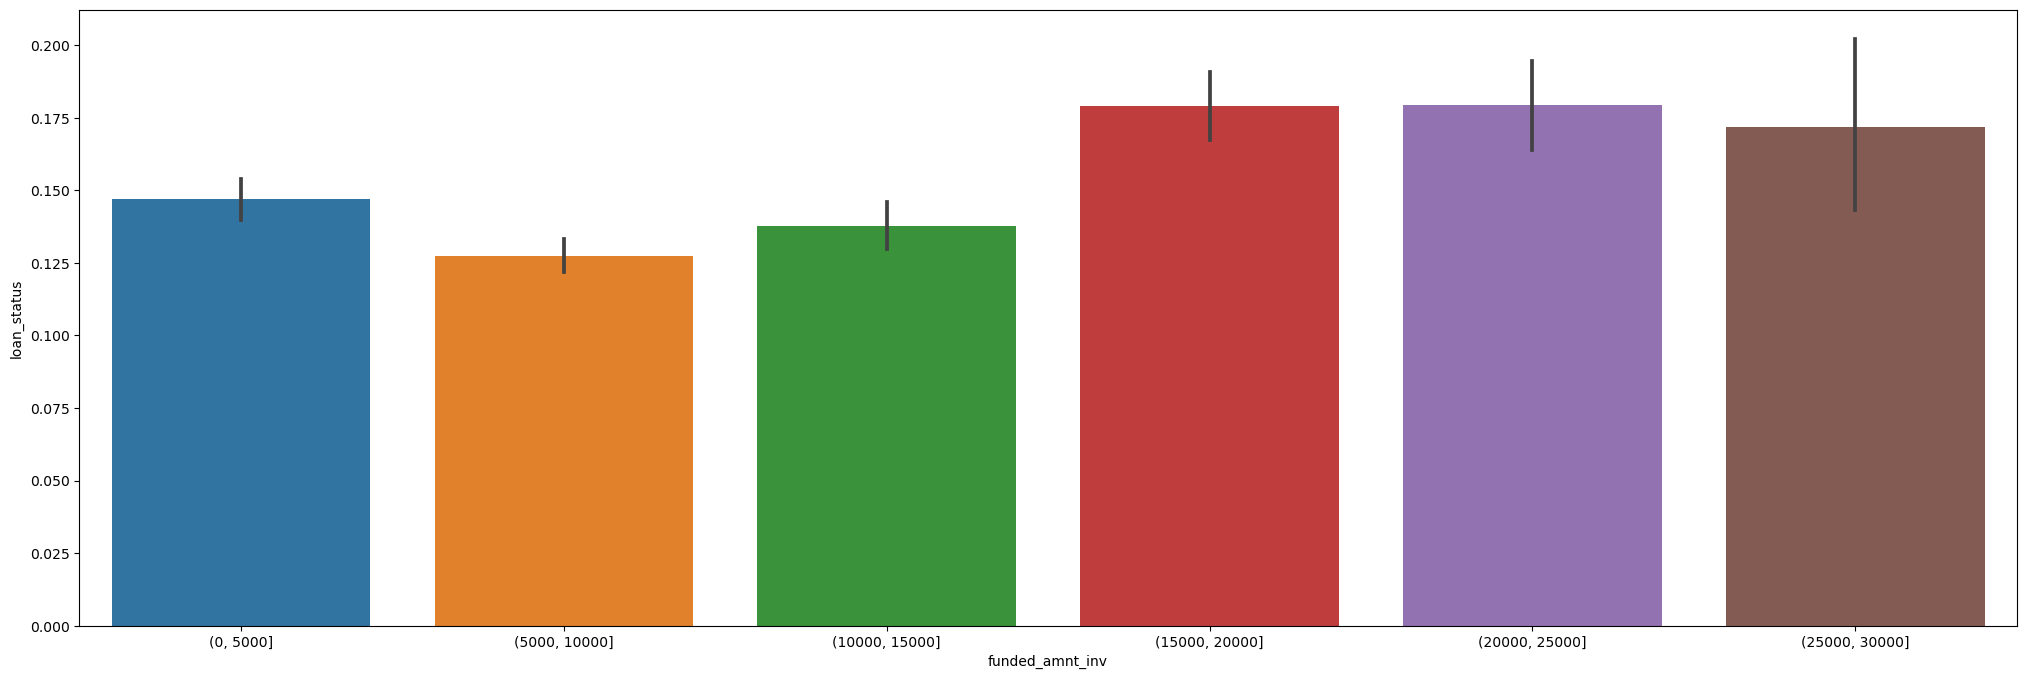

In [158]:

plt.figure(figsize=(25, 8))
sns.barplot(x='funded_amnt_inv', y='loan_status', data=df)
plt.show()

# As Fund amount inv is increasing then charged off % also increases

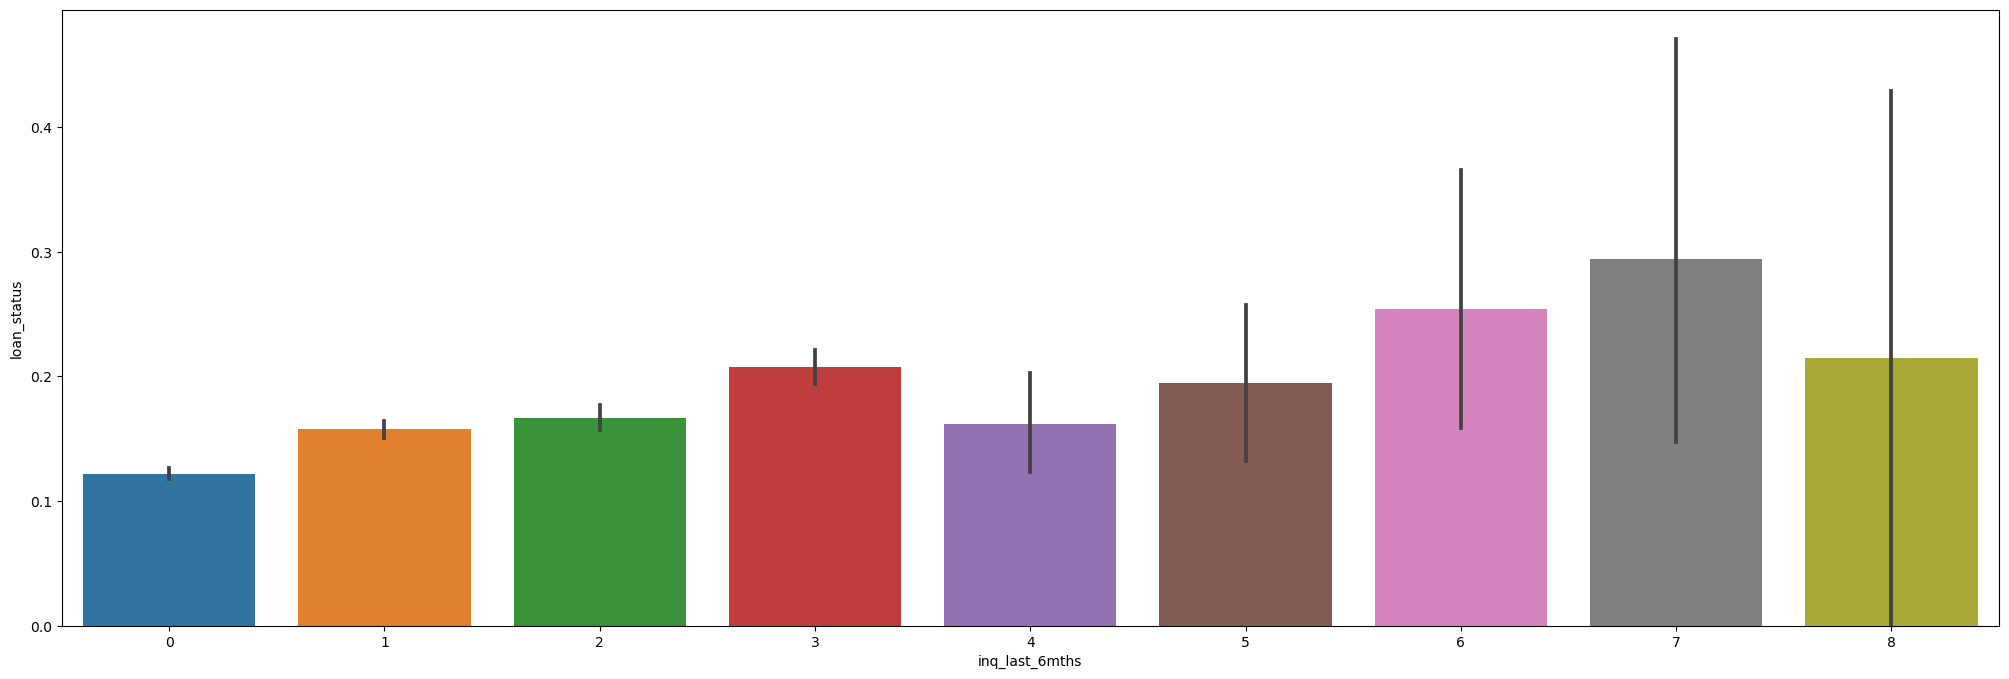

In [159]:
# inquires in last 6 months



plt.figure(figsize=(25, 8))
sns.barplot(x='inq_last_6mths', y='loan_status', data=df)
plt.show()

# Inferences :
# Considering some exceptions , as inq last 6 months increases default also increase

In [160]:
#Annual Income

df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: title={'center': 'annual_inc'}, xlabel='loan_status'>

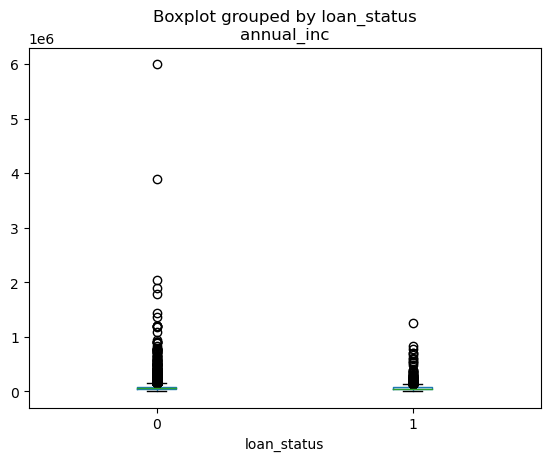

In [56]:
df.boxplot(by ='loan_status', column =['annual_inc'], grid = False) 

In [161]:
# handling the outliers
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-23000.0
145000.0


In [162]:
# Grouping into bins of 25000
df['annual_inc_range'] = pd.cut(x=df['annual_inc'], bins=range(0, 150000, 25000))


In [163]:
df['annual_inc_range']

0              (0.0, 25000.0]
1          (25000.0, 50000.0]
2              (0.0, 25000.0]
3          (25000.0, 50000.0]
5          (25000.0, 50000.0]
                 ...         
39712    (100000.0, 125000.0]
39713          (0.0, 25000.0]
39714     (75000.0, 100000.0]
39715                     NaN
39716          (0.0, 25000.0]
Name: annual_inc_range, Length: 38577, dtype: category
Categories (5, interval[int64, right]): [(0, 25000] < (25000, 50000] < (50000, 75000] < (75000, 100000] < (100000, 125000]]

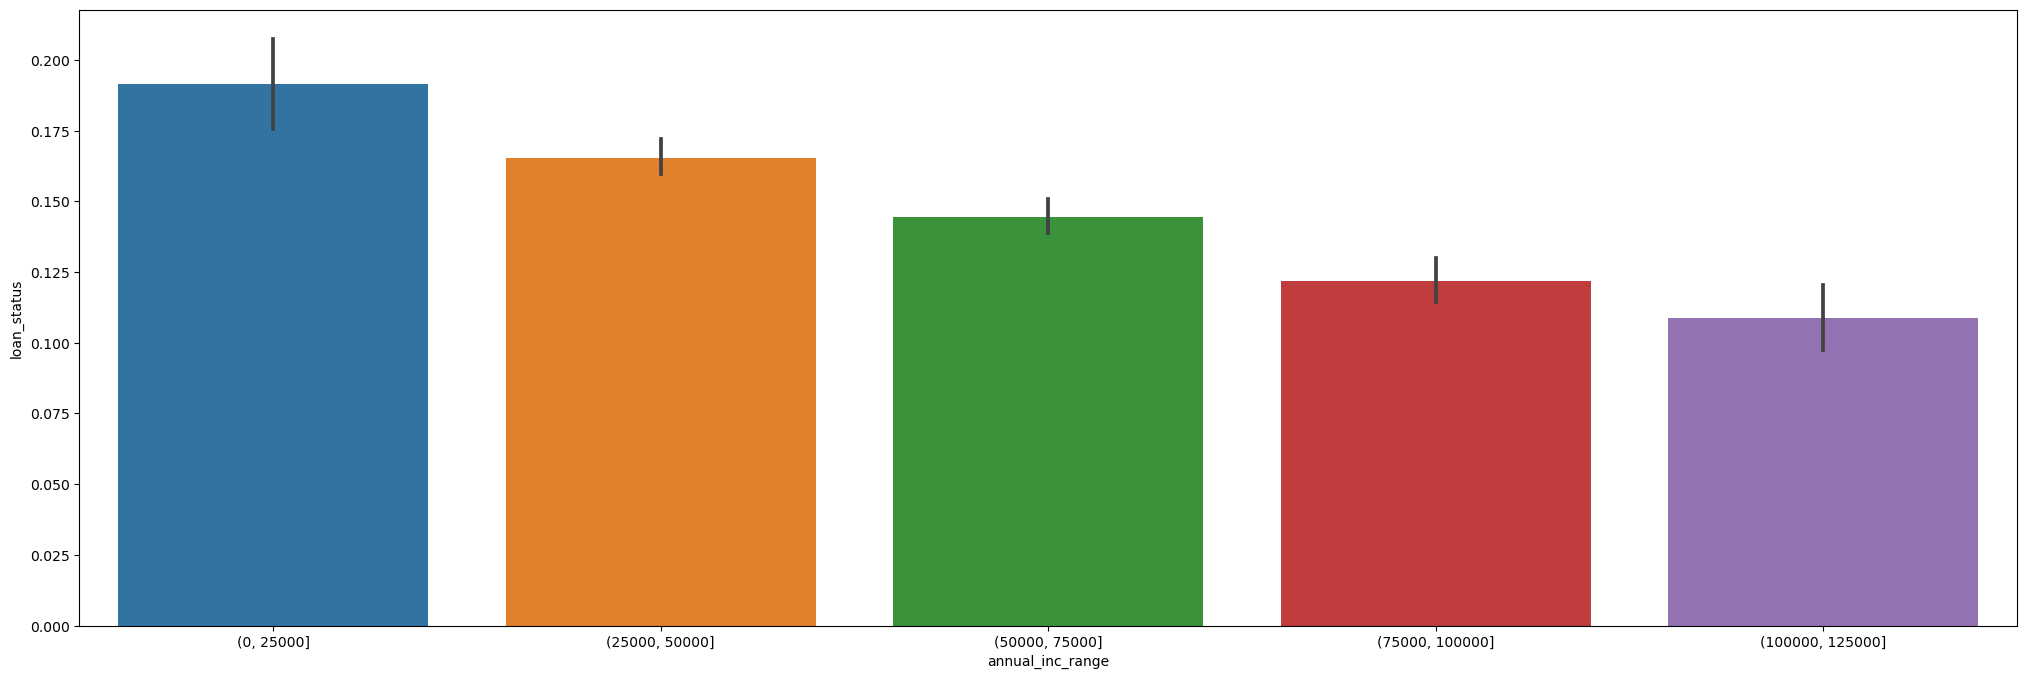

In [164]:
plt.figure(figsize=(25, 8))
sns.barplot(x='annual_inc_range', y='loan_status', data=df)
plt.show()

# When annual income is low , charged off is high . i.e As Annual income increases charged off decreases

In [165]:
# Funded amount

# funded_amnt
df['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [166]:
# handling the outliers
Q1 = df['funded_amnt'].quantile(0.25)
Q3 = df['funded_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-9500.0
29700.0


In [167]:

# Grouping into bins of size 5000 .

df['funded_amnt_range'] = pd.cut(x=df['funded_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])

In [168]:
df['funded_amnt_range'].head(5)

0        (0, 5000]
1        (0, 5000]
2        (0, 5000]
3    (5000, 10000]
5        (0, 5000]
Name: funded_amnt_range, dtype: category
Categories (7, interval[int64, right]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000] < (25000, 30000] < (30000, 35000]]

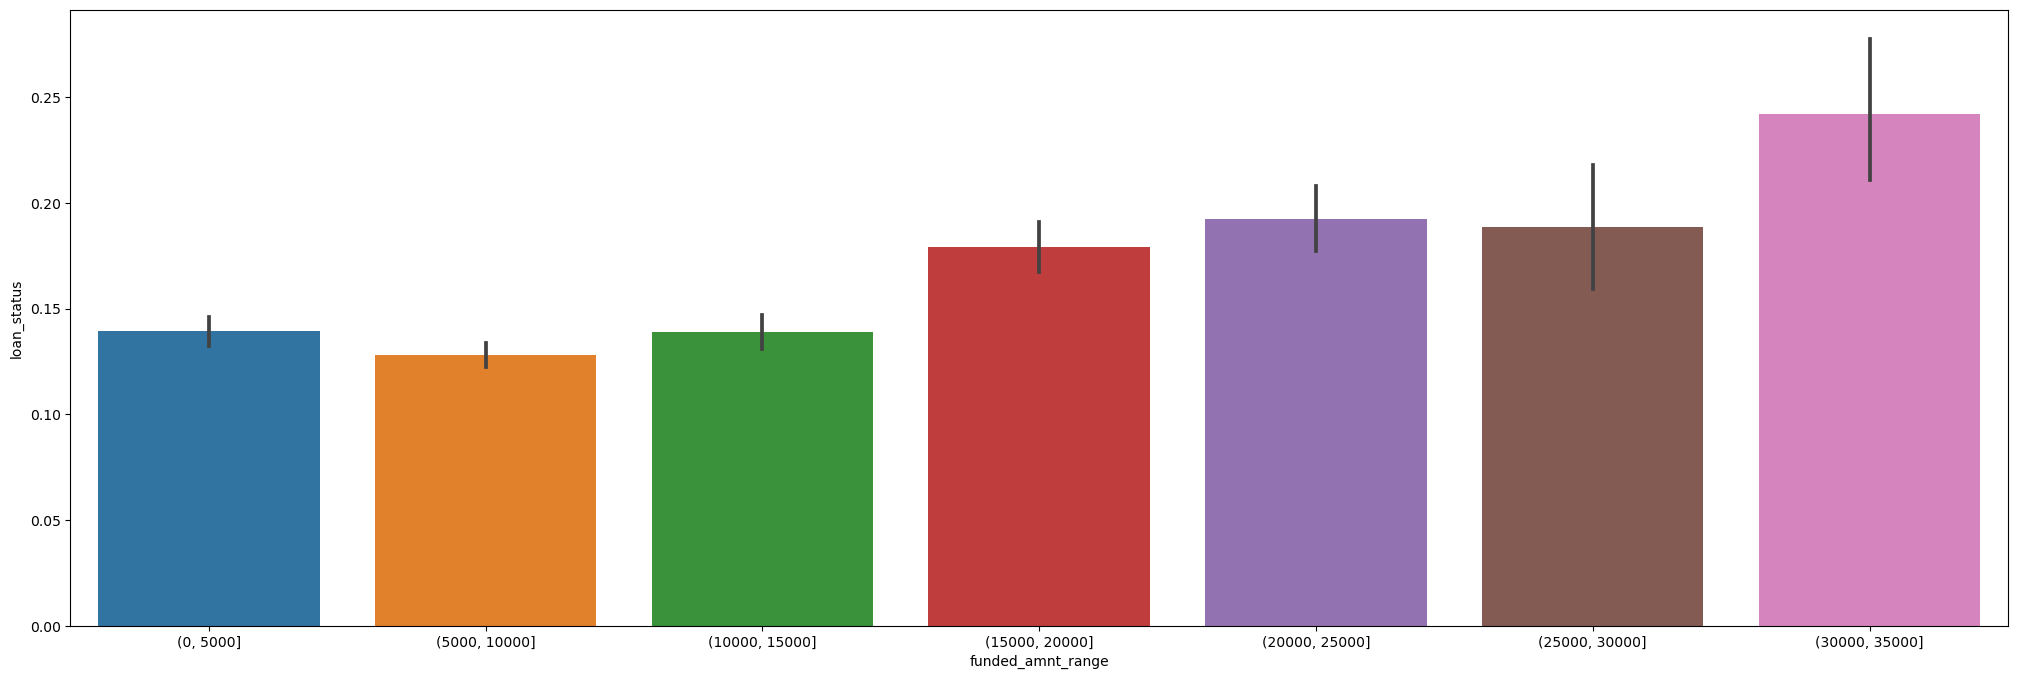

In [169]:
plt.figure(figsize=(25, 8))
sns.barplot(x='funded_amnt_range', y='loan_status', data=df)
plt.show()

# As Fund Amount is increasing , charged off also increases .

<Axes: xlabel='Purpose', ylabel='Loan Charged Off %'>

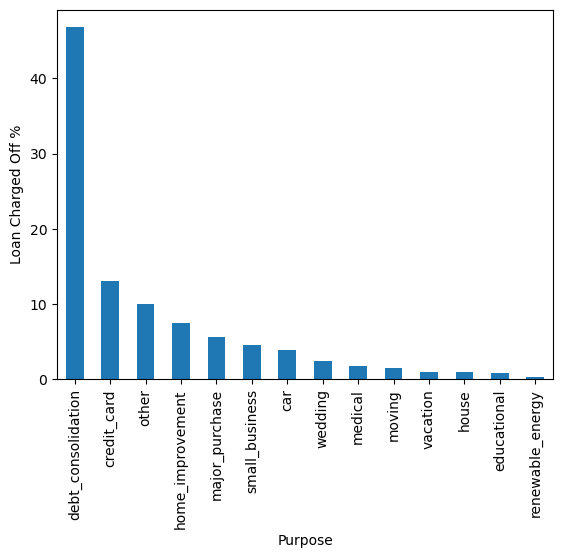

In [170]:
# Segmented Analysis

# Based on Freq of Purpose 

loan_amount_ranges_freq = df['purpose'].value_counts(normalize=True)*100
loan_amount_ranges_freq.plot(kind='bar', xlabel='Purpose', ylabel='Loan Charged Off %')

In [171]:
# Some important purposes are debt , credit card , home improvement , major purchase and small business

most_imp_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(most_imp_purposes)]
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
car                       0
educational               0
house                     0
medical                   0
moving                    0
other                     0
renewable_energy          0
small_business            0
vacation                  0
wedding                   0
Name: purpose, dtype: int64

In [ ]:
# Now find the patterns using purpose and other categorical type variables

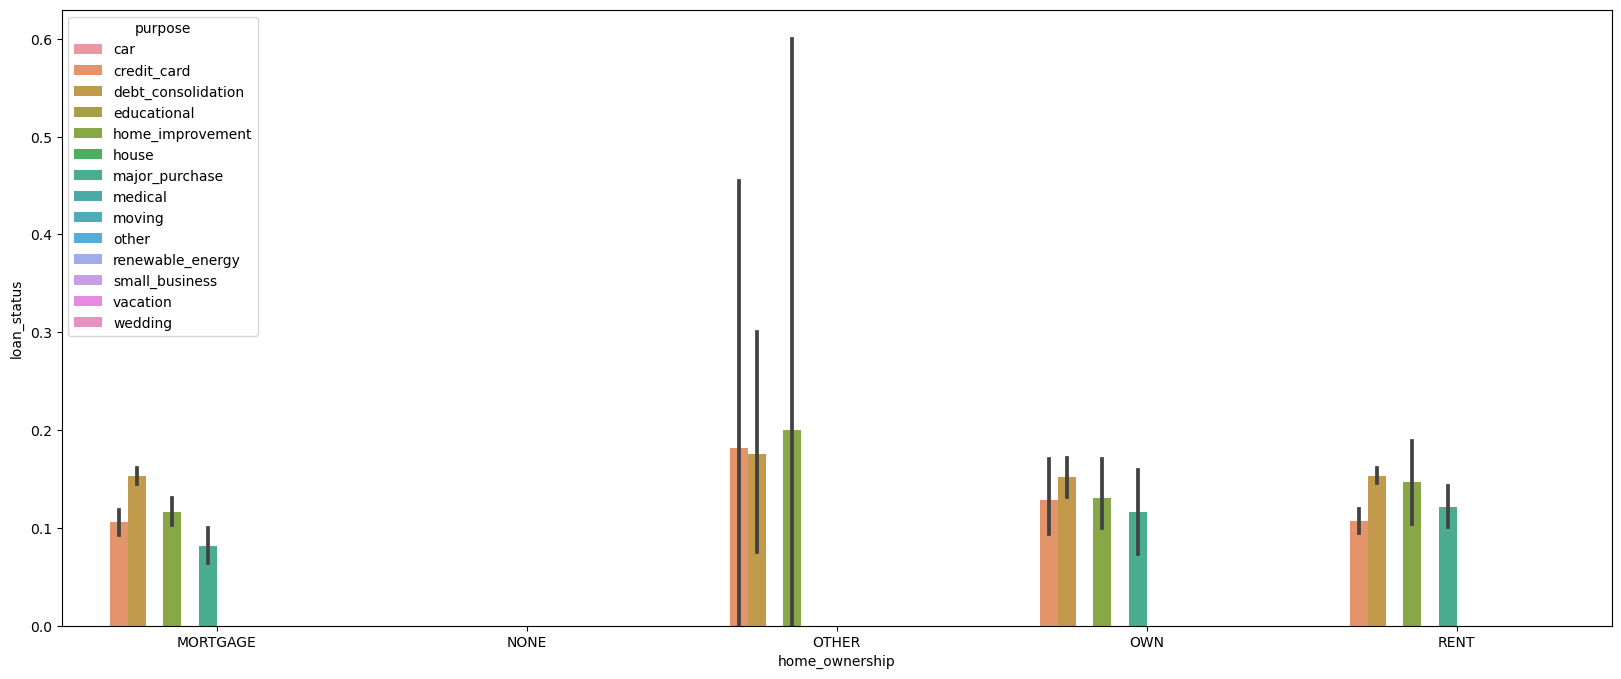

In [172]:
# home ownership
plt.figure(figsize=[20, 8])
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=df)
plt.show()

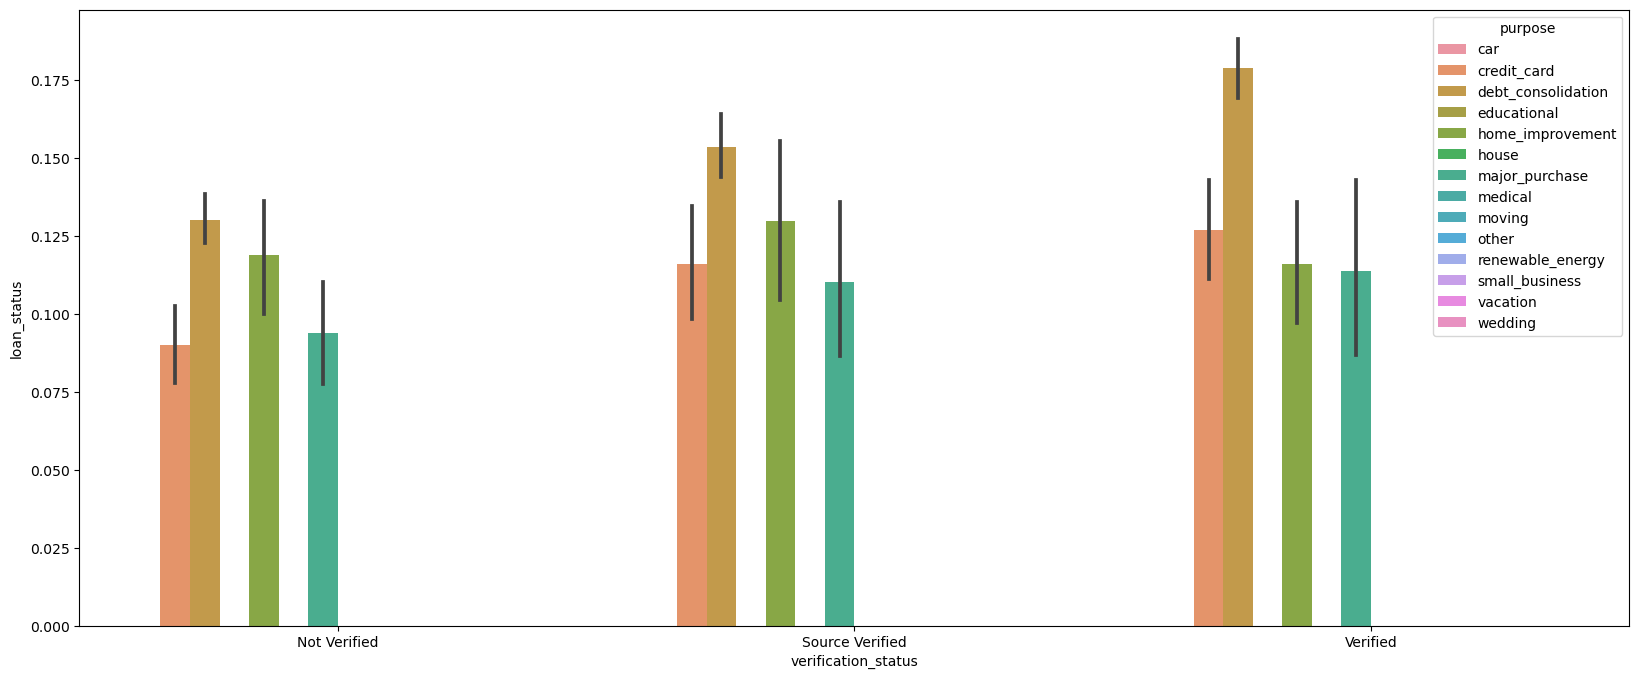

In [173]:
# verification_status
plt.figure(figsize=[20, 8])
sns.barplot(x='verification_status', y="loan_status", hue='purpose', data=df)
plt.show()

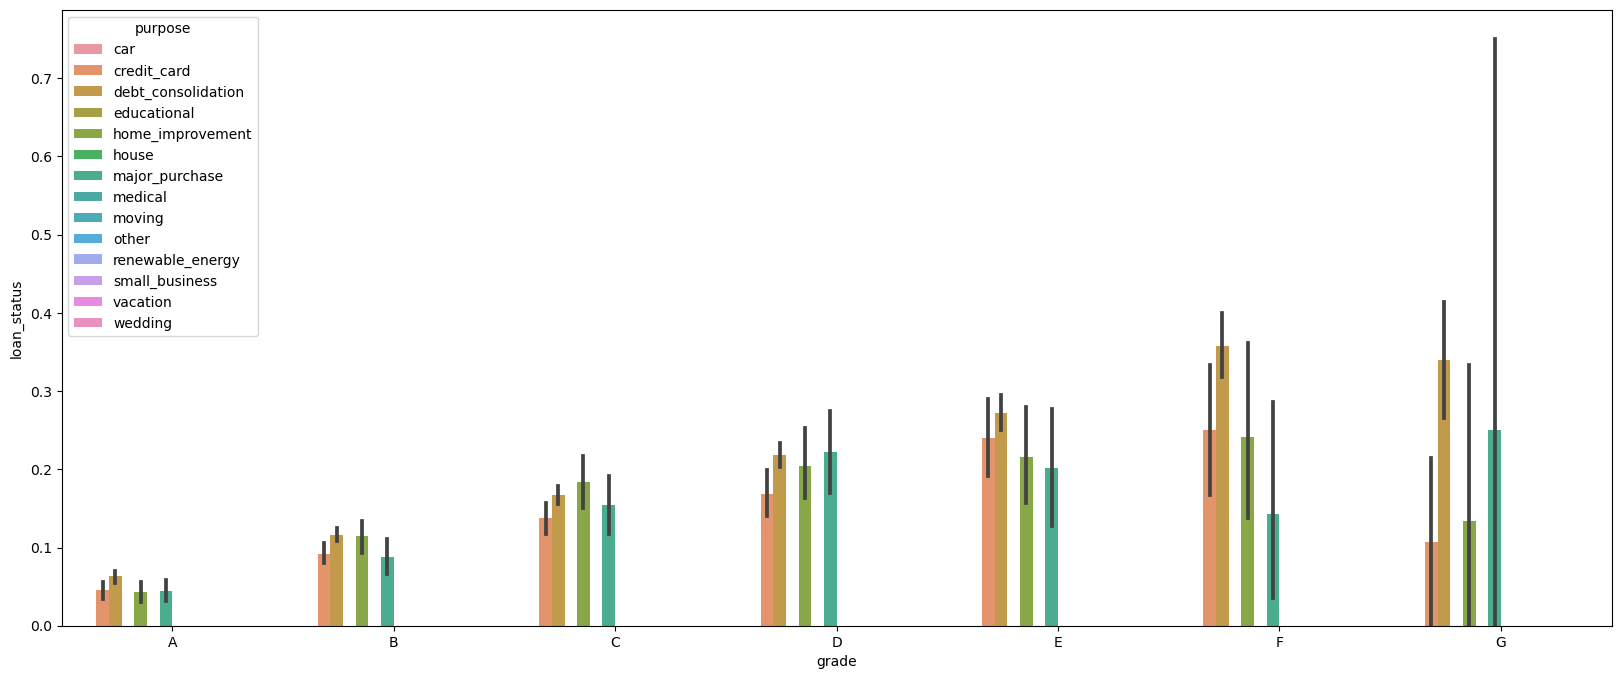

In [174]:
#Grade

plt.figure(figsize=[20, 8])
sns.barplot(x='grade', y="loan_status", hue='purpose', data=df)
plt.show()

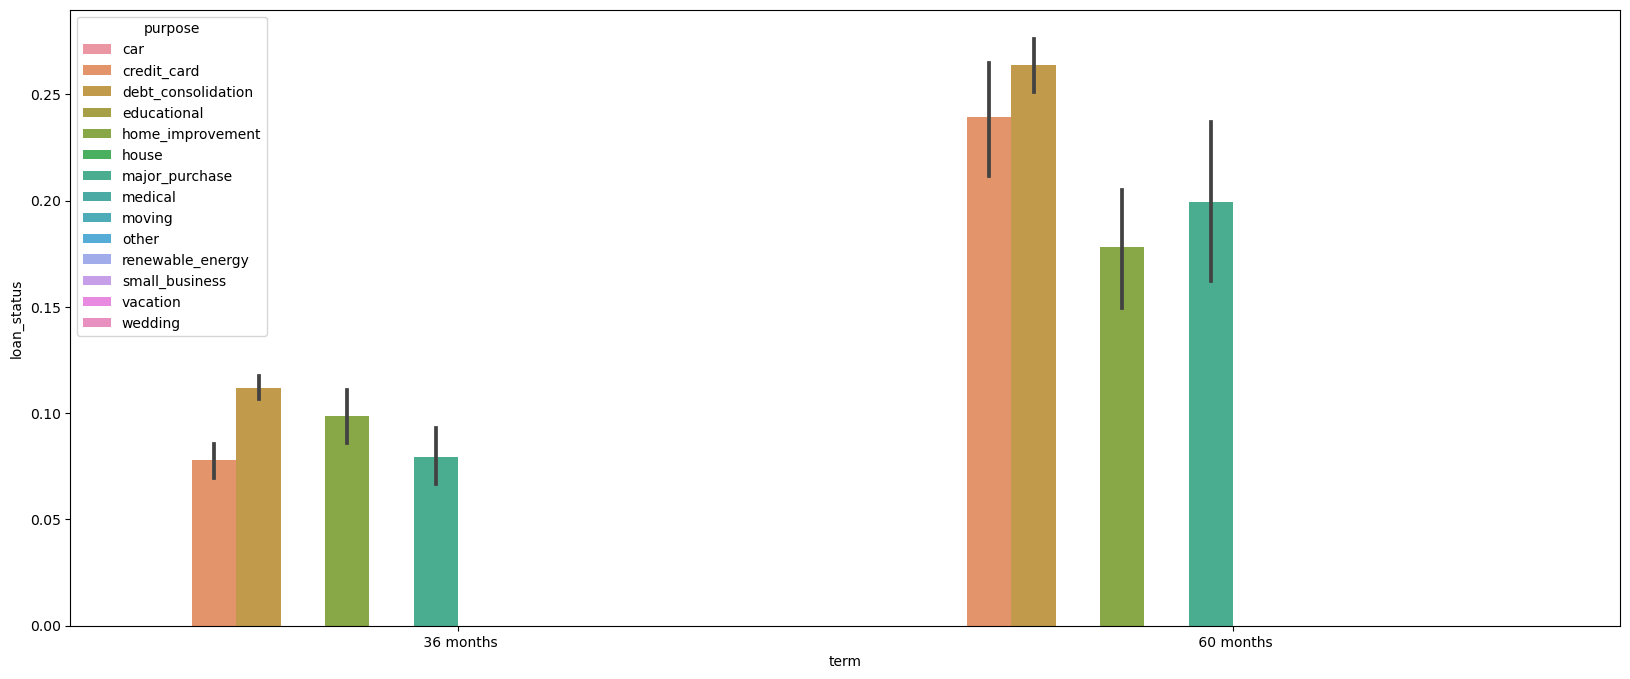

In [175]:
# Term

plt.figure(figsize=[20, 8])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

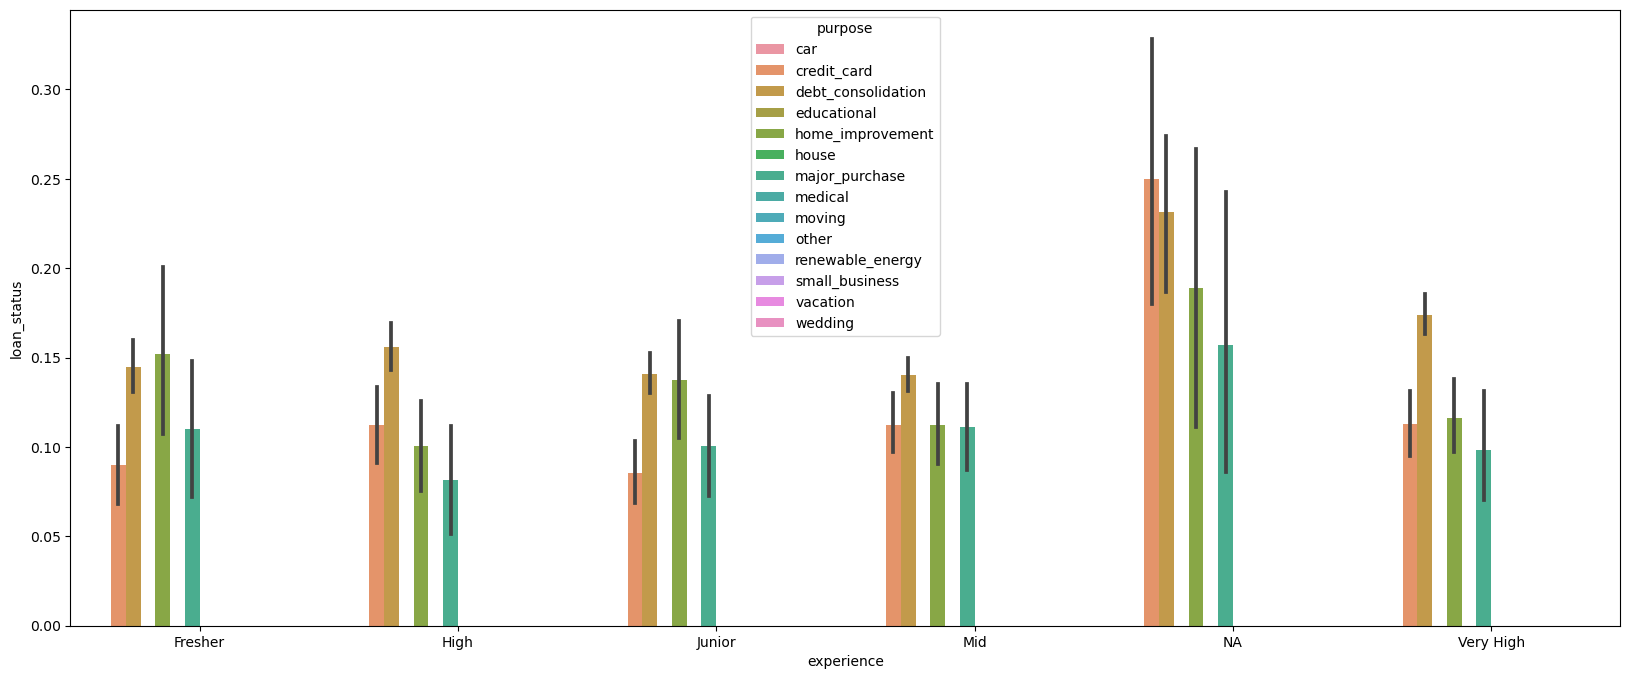

In [176]:
plt.figure(figsize=[20, 8])
sns.barplot(x='experience', y="loan_status", hue='purpose', data=df)
plt.show()

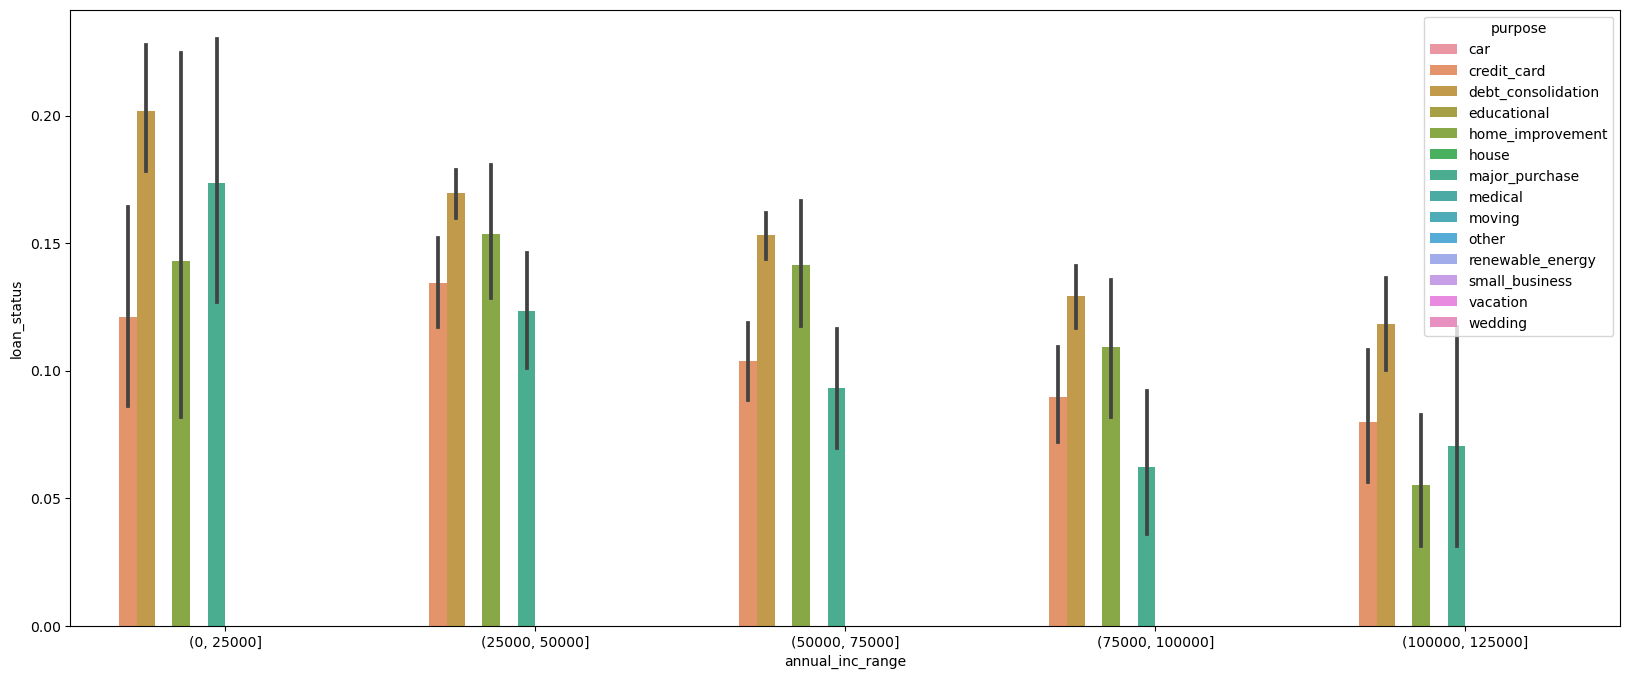

In [86]:
plt.figure(figsize=[20, 8])
sns.barplot(x='annual_inc_range', y="loan_status", hue='purpose', data=df)
plt.show()

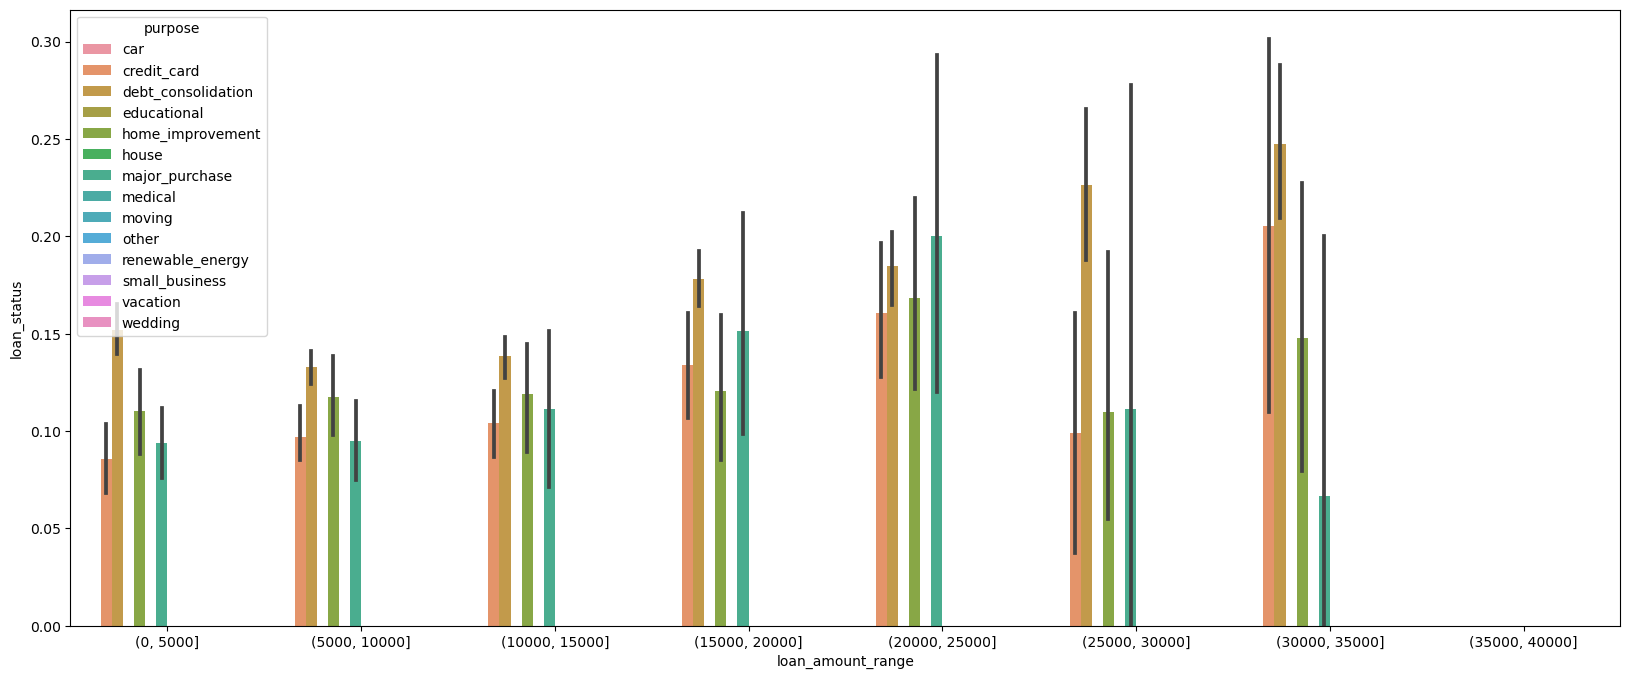

In [177]:
plt.figure(figsize=[20, 8])
sns.barplot(x='loan_amount_range', y="loan_status", hue='purpose', data=df)
plt.show()

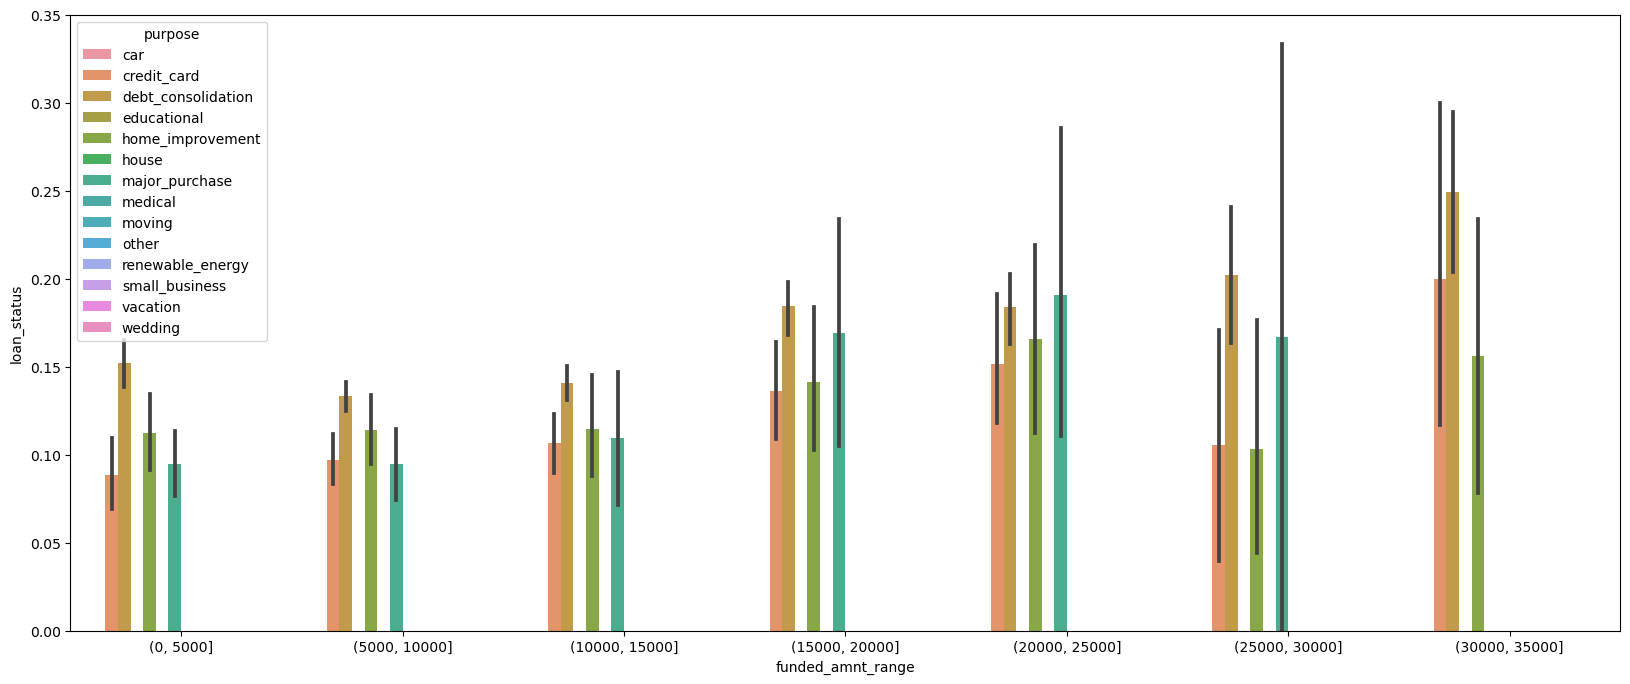

In [178]:
plt.figure(figsize=[20, 8])
sns.barplot(x='funded_amnt_range', y="loan_status", hue='purpose', data=df)
plt.show()

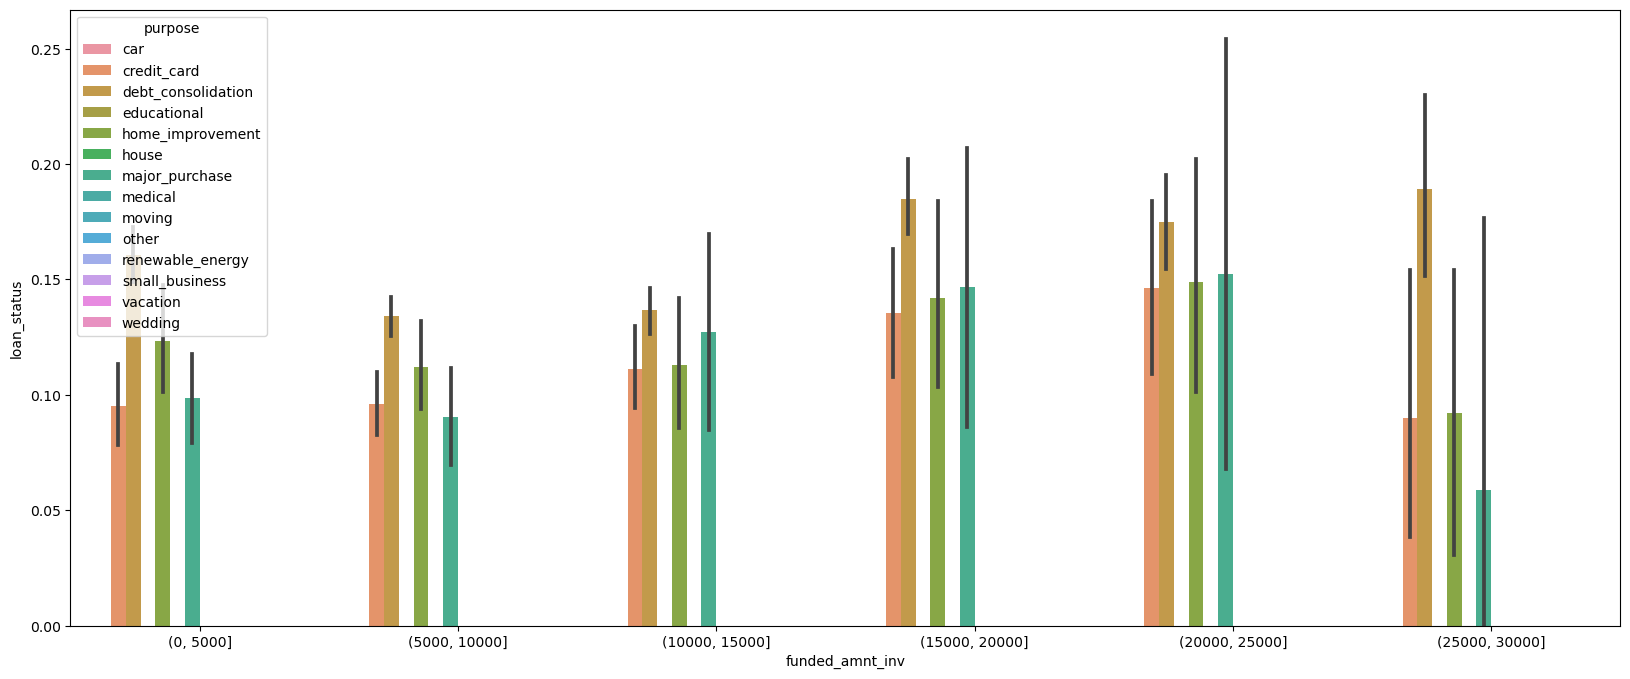

In [179]:
plt.figure(figsize=[20, 8])
sns.barplot(x='funded_amnt_inv', y="loan_status", hue='purpose', data=df)
plt.show()

In [ ]:
# Now find the patterns using term and other categorical type variables

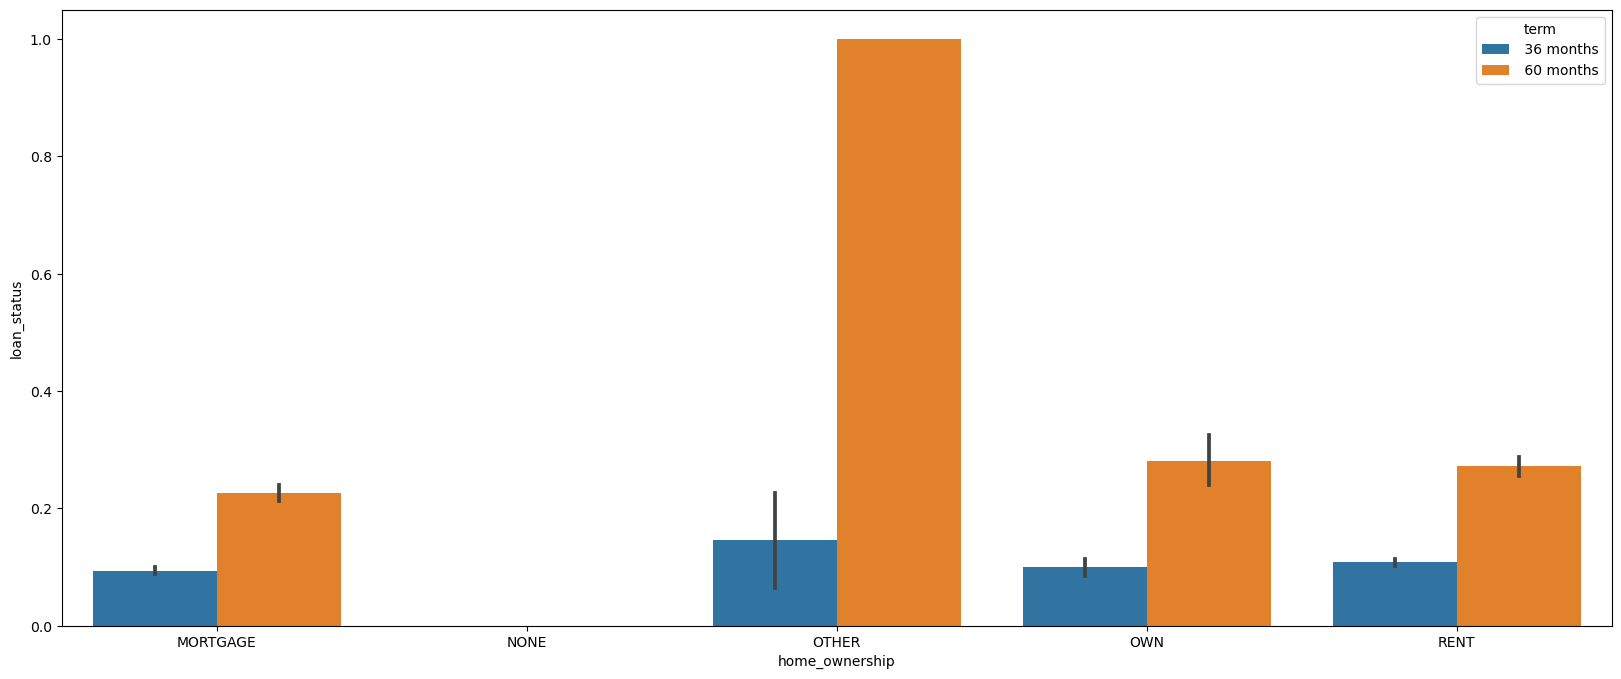

In [180]:

# home ownership
plt.figure(figsize=[20, 8])
sns.barplot(x='home_ownership', y="loan_status", hue='term', data=df)
plt.show()



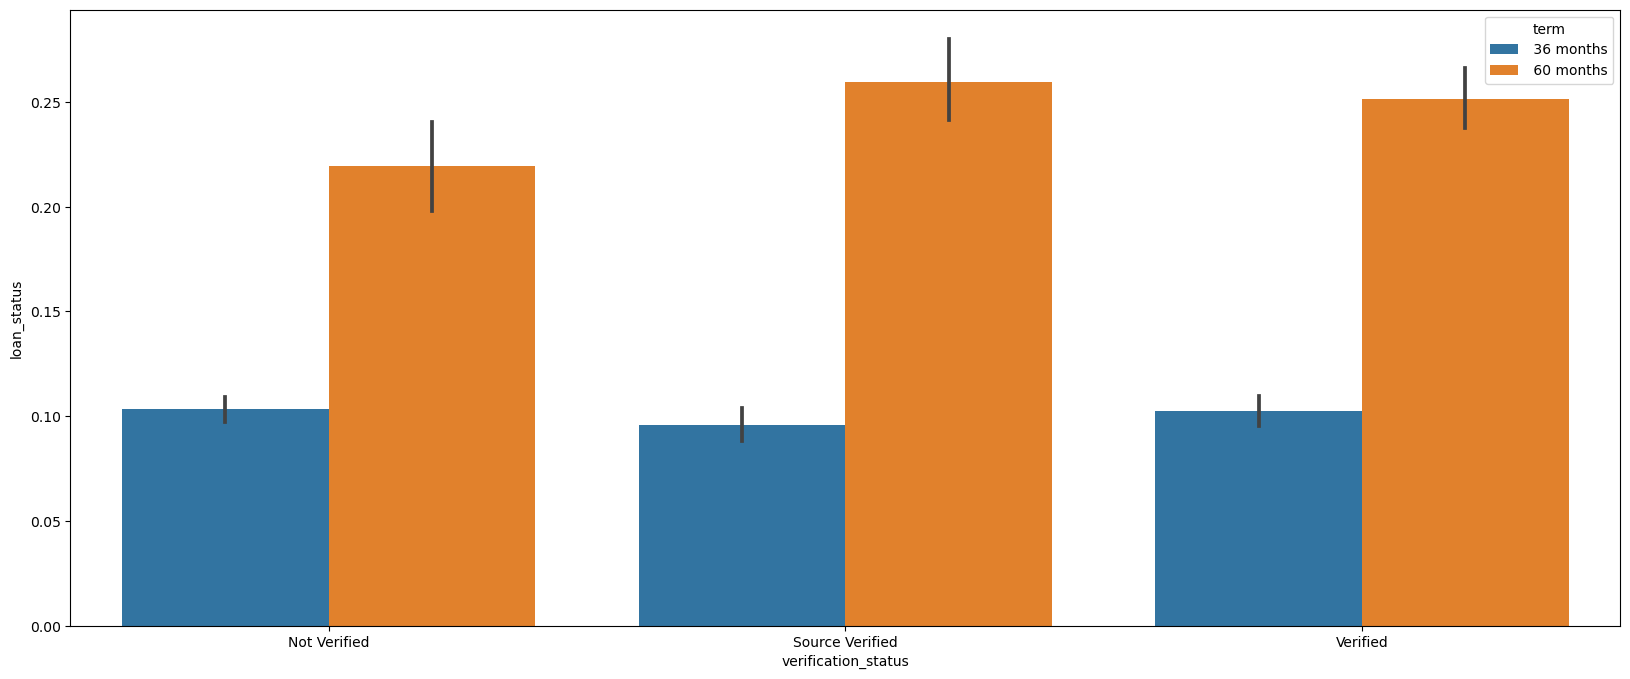

In [181]:

# verification status
plt.figure(figsize=[20, 8])
sns.barplot(x='verification_status', y="loan_status", hue='term', data=df)
plt.show()

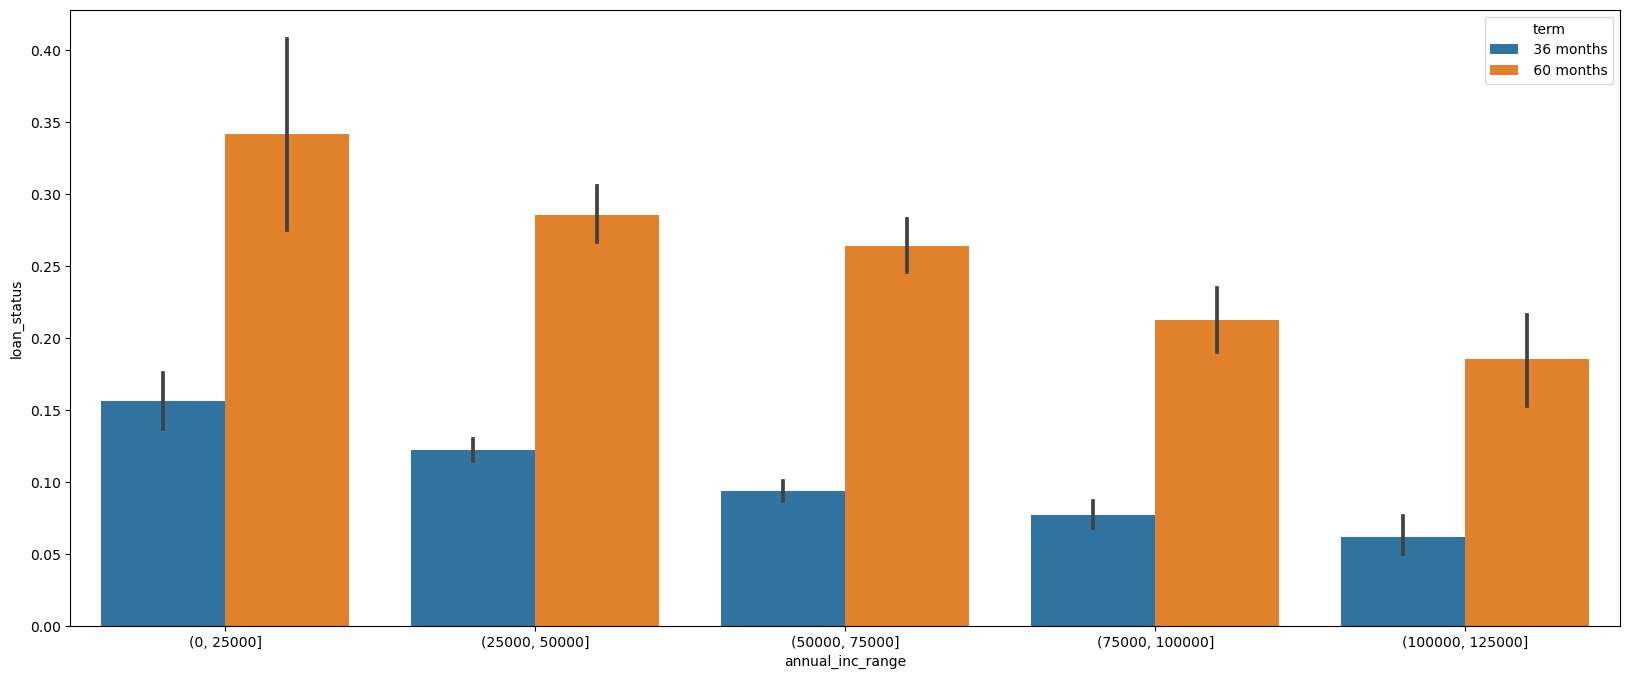

In [182]:
# Annual income
plt.figure(figsize=[20, 8])
sns.barplot(x='annual_inc_range', y="loan_status", hue='term', data=df)
plt.show()

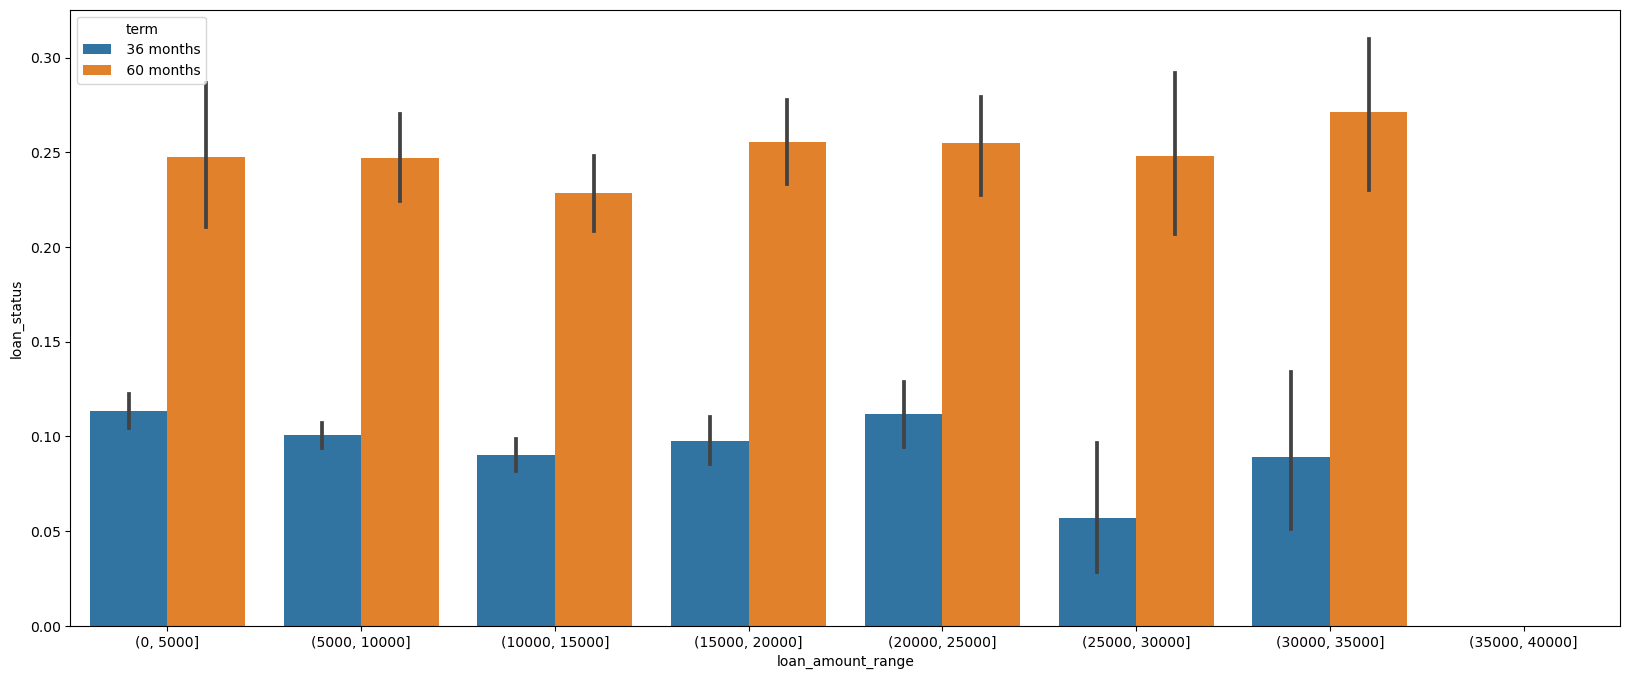

In [183]:
# Annual income
plt.figure(figsize=[20, 8])
sns.barplot(x='loan_amount_range', y="loan_status", hue='term', data=df)
plt.show()

In [ ]:
# # Now find the patterns using experience and other categorical type variables

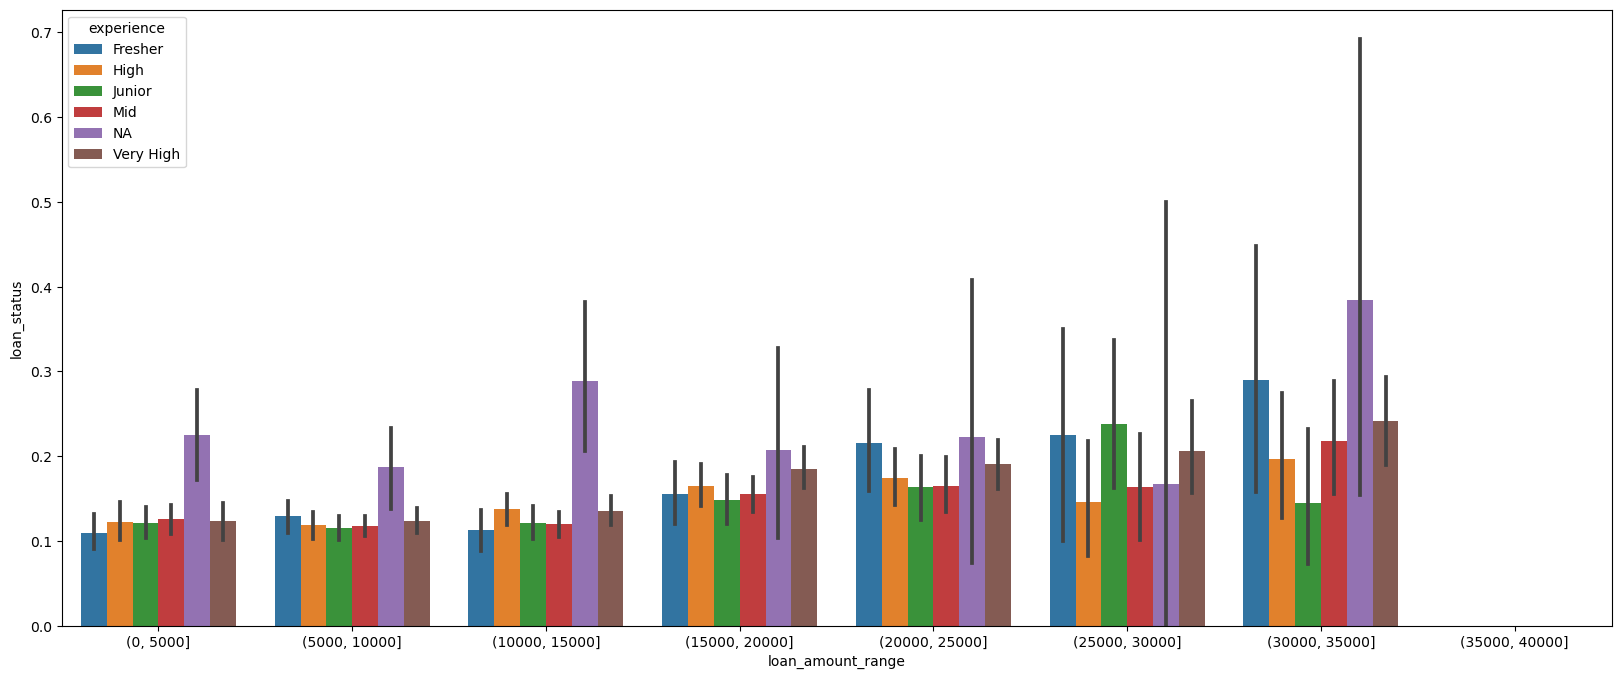

In [185]:
plt.figure(figsize=[20, 8])
sns.barplot(x='loan_amount_range', y="loan_status", hue='experience', data=df)
plt.show()

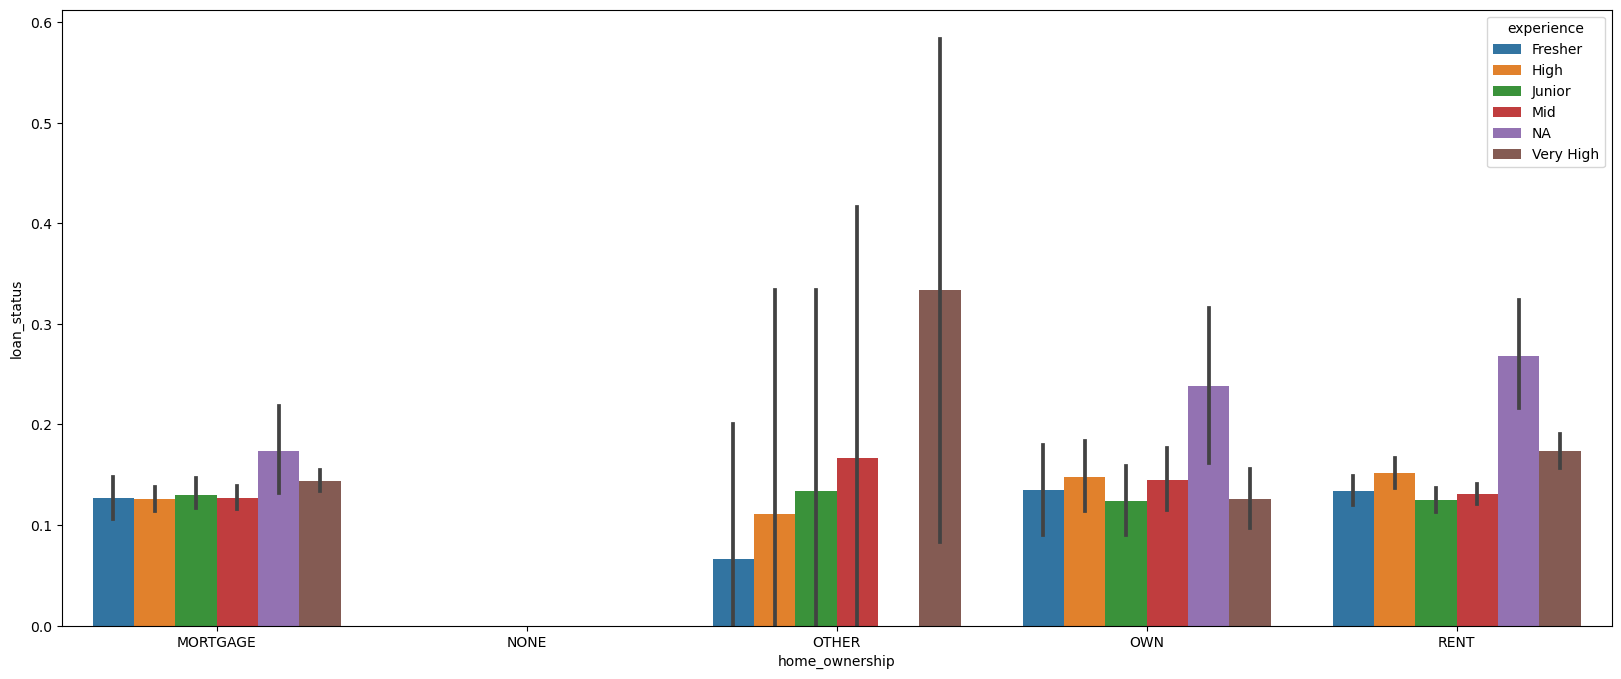

In [186]:
# home ownership
plt.figure(figsize=[20, 8])
sns.barplot(x='home_ownership', y="loan_status", hue='experience', data=df)
plt.show()